# Introduction

In the fire season of 2019-2020, Australia faced unprecedented bushfire conditions. [Sources have shown](https://www.theverge.com/2020/1/3/21048891/australia-wildfires-koalas-climate-change-bushfires-deaths-animals-damage) that, as of February 2020, more than 25.5 million acres are burnt, causing more than 30 deaths and damaging more than 3000 homes. In January 2020, both Queesland and New South Wales have declared a state of emergency due to bushfire-related property losses. 

Bushfire is a form of uncontrolled fires that occurs regularly in Oceania, and specifically, in Australia. While bushfires are often caused by weather factors such as dry lightning in remote areas with a strong wind setting, a considerable proportion of the fires are caused by human factors, either by accident or arson. In fact, according to Collen Bryant's paper *Understanding bushfire: trends in deliberate vegetation fires in Australia* ([ISSN: 1445-7261](https://aic.gov.au/publications/tbp/tbp027)), about 50% of all cases of Australian bushfire are human caused, and are specifically arson or suspected arson.

According to Australian Bureau of Meteorology's [*2018 State of the Climate Report*](http://www.bom.gov.au/state-of-the-climate/), the country has warmed by more than one degree in the last century. Consequently, extreme heatwaves and droughts occur with high frequency and intensity, which is the main reason of the increasing trend of widespread, persistent bushfires in recent years.

The bushfires have high carbon emissions that may further contribute to global warming and climate change. Scientists, equipped with the [Global Fire Emissions Database](https://www.globalfiredata.org/), have estimated that the fire has emitted more than 900 million metric tons of carbon, which is approximately 150% of the country's yearly carbon emission, so that the bushfires are estimated to double or triple the nation's yearly amount. Incomplete combustion also releases bushfire smoke that has serious health consequences. According to a research conducted by Yu et al. ([DOI: 10.1016/S2542-5196(19)30267-0](https://www.thelancet.com/journals/lanplh/article/PIIS2542-5196(19)30267-0/fulltext)), the hazardous components of smoke are mainly $PM_{2.5}$ and $PM_{10}$, and that the concentration of those particles in major cities such as Sydney was four times higher than WHO's guideline value in the fire season, which will lead to at least a 5.6% increase of daily all-cause mortality, 4.5% increase in cardiovascular mortality, and 6.1% increase in respiratory mortality. 

The project explores the correlation between the fire instances in Australia between August 1, 2019 and January 11, 2020, and the air quality in three Australian cities of Sydney, Brisbane, and Adelaide. In particular, the daily average PM2.5 concentration of the cities are categorized into levels, and Random Forest/Decision Tree/KNN models are developed to predict the PM2.5 concentration level in the cities, given the data of the fire instances on that day.

In this project, the datasets obtained include:
- Fire instances: [NASA's VIIRS I-Band 375m Active Fire Data](https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/viirs-i-band-active-fire-data)
- Sydney air quality: [New South Wales Department of Planning, Industry, and Environment](https://www.dpie.nsw.gov.au/air-quality/search-for-and-download-air-quality-data)
- Brisbane air quality: [Queensland Government Environment, Land, and Water](https://apps.des.qld.gov.au/air-quality/download/)
- Adelaide air quality: [South Australian Government Data Directory](https://data.sa.gov.au/data/dataset/adelaide-cbd-air-quality-monitoring-station-particle)

In the following, a brief visualization of the fire instances is demonstrated, followed by the implementation of various classification models to predict the PM2.5 levels of the three selected cities in the given period using the fire instances' data, and finally, the correlation between the various satellite images' pixel attributes and the level of confidence of fire in the area is explored. 

For more information about the data columns, please refer to [here](https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/viirs-i-band-active-fire-data). 

# Data Cleaning and Data Engineering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read in the dataset for the fire instances observed by NASA's VIIRS satellite.

In [2]:
v1DF = pd.read_csv('fire_nrt_V1_96617.csv')
v1aDF = pd.read_csv('fire_archive_V1_96617.csv')
v1DF.tail()

latitude  longitude  bright_ti4  scan  track    acq_date  acq_time  \
956252 -32.66628  122.15253       306.9  0.39   0.44  2020-01-11      1630   
956253 -32.58616  123.39582       299.0  0.51   0.41  2020-01-11      1630   
956254 -33.37853  115.94735       309.7  0.40   0.60  2020-01-11      1630   
956255 -33.21827  115.75078       300.2  0.49   0.65  2020-01-11      1806   
956256 -33.22012  115.75043       300.3  0.49   0.65  2020-01-11      1806   

       satellite instrument confidence version  bright_ti5  frp daynight  
956252         N      VIIRS          n  1.0NRT       288.6  0.8        N  
956253         N      VIIRS          n  1.0NRT       287.4  0.7        N  
956254         N      VIIRS          n  1.0NRT       291.7  1.0        N  
956255         N      VIIRS          n  1.0NRT       290.2  1.1        N  
956256         N      VIIRS          n  1.0NRT       290.0  0.6        N

In [3]:
v1aDF.tail()

latitude  longitude  bright_ti4  scan  track    acq_date  acq_time  \
184773 -32.37209  116.10032       296.1  0.48   0.40  2019-09-30      1702   
184774 -32.38958  116.11151       296.1  0.48   0.40  2019-09-30      1702   
184775 -33.12481  116.03968       299.9  0.47   0.40  2019-09-30      1702   
184776 -33.63480  122.92641       296.2  0.43   0.38  2019-09-30      1702   
184777 -33.63897  122.93050       297.3  0.44   0.38  2019-09-30      1702   

       satellite instrument confidence  version  bright_ti5  frp  type  
184773         N      VIIRS          n        1       284.8  1.2     0  
184774         N      VIIRS          n        1       284.7  1.1     0  
184775         N      VIIRS          n        1       285.0  1.3     0  
184776         N      VIIRS          n        1       285.9  0.5     0  
184777         N      VIIRS          n        1       285.9  0.6     0

Further investigation is required to decide: 
- whether the "type" column in v1aDF should be dropped.
- whether the "daynight" column in v1DF should be dropped.
- if the "daynight" column is not dropped, should it be further engineered?
- which of the other columns are generally irrelevant and can be dropped?

Whether the "type" column in v1aDF should be dropped:

0    180150
3      2735
2      1893
Name: type, dtype: int64

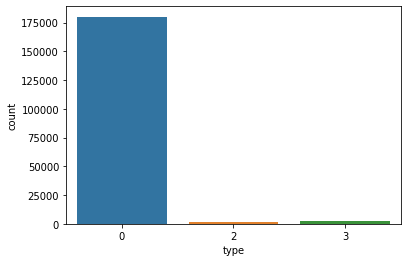

In [4]:
sns.countplot(x='type', data = v1aDF)
v1aDF['type'].value_counts()

Note that the number of instances of type 2 and type 3 is trivial to that of type 0. Thus, it is best to remove all instances of type 2 and type 3, and drop the type column.

In [5]:
v1aDF = v1aDF[v1aDF['type'] == 0]
v1aDF.drop('type', axis = 1, inplace=True)

Whether the "daynight" column in v1DF should be dropped:

In [6]:
v1DF.groupby('daynight').mean()

latitude   longitude  bright_ti4      scan     track     acq_time  \
daynight                                                                       
D        -25.236403  139.595386  350.635881  0.462709  0.493149   419.983556   
N        -29.555114  144.625666  318.255255  0.458231  0.468574  1517.213150   

          bright_ti5        frp  
daynight                         
D         309.337583  26.315024  
N         289.912918   5.474355

Observe that the brightness ("bright_ti4" and "bright_ti5") of the satellite pixels for the fire is generally higher during the day by around 10% - 15%. Also, notice that the radiative power of the pixels, measured by column "frp", is significantly higher during the day than at night. It is thus concluded that the "daynight" column cannot be dropped. 

In this way, it is necessary to engineer the data for v1aDF's "daynight" column, which is originally absent. First, observe that day and night is strictly related to the acquired time "acq_time" feature in v1DF.

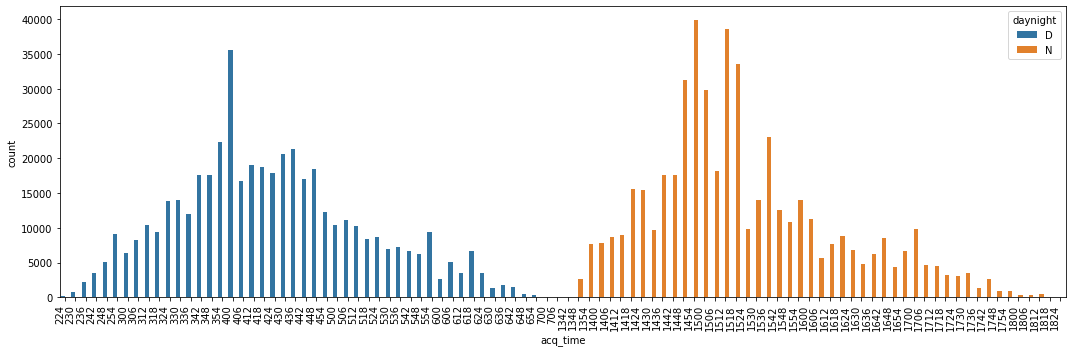

In [7]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(x ='acq_time', hue = 'daynight', data = v1DF)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [8]:
print(v1DF[v1DF['daynight'] == 'D']['acq_time'].value_counts().sort_index().head(2))
print(v1DF[v1DF['daynight'] == 'D']['acq_time'].value_counts().sort_index().tail(2))
print(v1DF[v1DF['daynight'] == 'N']['acq_time'].value_counts().sort_index().head(2))
print(v1DF[v1DF['daynight'] == 'N']['acq_time'].value_counts().sort_index().tail(2))

224    186
230    706
Name: acq_time, dtype: int64
700    46
706    45
Name: acq_time, dtype: int64
1342      19
1348    2704
Name: acq_time, dtype: int64
1818    32
1824     4
Name: acq_time, dtype: int64


In this way, it is observed that given a fire instance, it has "daynight" = D if and only if "acq_time" $\in$ (2:24, 7:06); it has "daynight" = N if and only if  "acq_time" $\in$ (13:42, 18:24).

Now observe the distribution of "acq_time" for v1aDF.

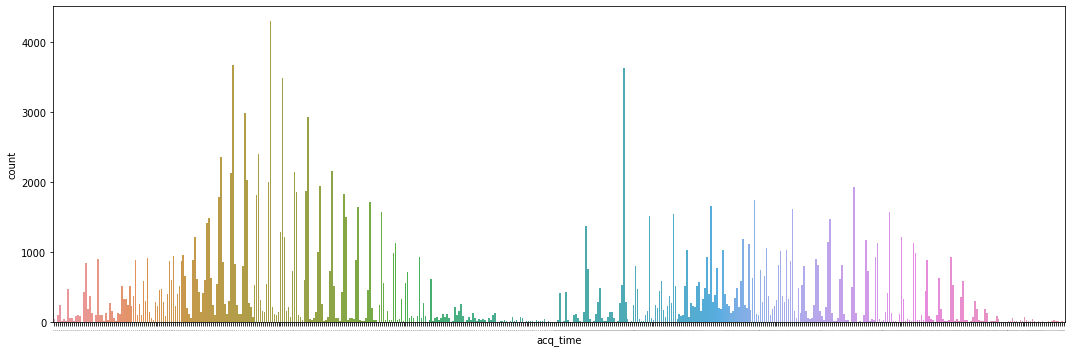

In [9]:
plt.figure(figsize = (15, 5))
ax = sns.countplot(x ='acq_time', data = v1aDF)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=1)
plt.tight_layout()
plt.show()

In [10]:
print(v1aDF[(v1aDF['acq_time'] > 710) & (v1aDF['acq_time'] < 1350)]['acq_time'].value_counts())
print(v1aDF[(v1aDF['acq_time'] > 1820)]['acq_time'].value_counts())

1347    3
1349    2
Name: acq_time, dtype: int64
1824    7
1827    3
1821    2
Name: acq_time, dtype: int64


In this way, it is observed that for v1aDF, given a fire instance, it has "daynight" = N if and only if "acq_time" $\in$ (13:45, 18:30); else we treat it as "daynight" = D.

D    104482
N     75668
Name: daynight, dtype: int64

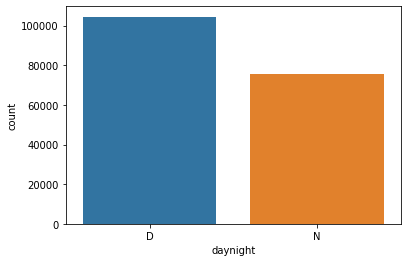

In [11]:
v1aDF['daynight'] = v1aDF['acq_time'].apply(lambda x: 'N' if ((x >= 1345) and (x <= 1830)) else 'D')
sns.countplot('daynight', data = v1aDF)
v1aDF['daynight'].value_counts()

We can now concatenate the two dataframes together.

In [12]:
print(v1DF.shape, v1aDF.shape)
v1DF = pd.concat([v1DF, v1aDF])
print(v1DF.shape)

(956257, 14) (180150, 14)
(1136407, 14)


To determine which of the other columns are generally irrelevant and can be dropped:
- Notice that after using the "acq_time" to determine "daynight", the significance of "acq_time" is minimal, as eventually, the focus will be predicting the air quality level for each city at a daily basis. 
- Further observation on the following columns shows little significance: satellite, instrument, and version. 

Therefore, we drop these 4 columns.

In [13]:
print(v1DF['satellite'].value_counts())
print(v1DF['instrument'].value_counts())
print(v1DF['version'].value_counts())

N    1136407
Name: satellite, dtype: int64
VIIRS    1136407
Name: instrument, dtype: int64
1.0NRT    956257
1         180150
Name: version, dtype: int64


In [14]:
v1DF.drop(['satellite', 'instrument', 'version', 'acq_time'], axis = 1, inplace=True)

Further format the columns and data types:

In [15]:
cols = ['latitude','longitude','bright_ti4','bright_ti5','frp','daynight',
        'scan','track','acq_date','confidence']
v1DF = v1DF[cols]

In [16]:
# Convert string to datetime objects.
v1DF['acq_date'] = pd.to_datetime(v1DF['acq_date'])

In [17]:
v1DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1136407 entries, 0 to 184777
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   latitude    1136407 non-null  float64       
 1   longitude   1136407 non-null  float64       
 2   bright_ti4  1136407 non-null  float64       
 3   bright_ti5  1136407 non-null  float64       
 4   frp         1136407 non-null  float64       
 5   daynight    1136407 non-null  object        
 6   scan        1136407 non-null  float64       
 7   track       1136407 non-null  float64       
 8   acq_date    1136407 non-null  datetime64[ns]
 9   confidence  1136407 non-null  object        
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 95.4+ MB


Now, read in the Sydney air quality input.

In [18]:
sydney = pd.read_excel('sydney.xls')
sydney.head()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


Daily Averages Time Range: 01/08/2019 00:00 to 01/02/2020 00:00  \
0                                       Initial Data                
1                                               Date                
2                                         01/08/2019                
3                                         02/08/2019                
4                                         03/08/2019                

                        Unnamed: 1                      Unnamed: 2  \
0          RANDWICK SO2 1h average          ROZELLE SO2 1h average   
1  RANDWICK SO2 24h average [pphm]  ROZELLE SO2 24h average [pphm]   
2                              0.1                             0.1   
3                              0.1                             0.3   
4                              0.1                             0.1   

                         Unnamed: 3                        Unnamed: 4  \
0          LINDFIELD SO2 1h average          LIVERPOOL SO2 1h average   
1  LINDFIELD SO2 24h average [pphm]  LIVERPOOL SO2 24h average [pphm]   
2                               NaN                               0.1   
3                               NaN                               0.1   
4                               NaN                               0.1   

                         Unnamed: 5                       Unnamed: 6  \
0          BRINGELLY SO2 1h average          CHULLORA SO2 1h average   
1  BRINGELLY SO2 24h average [pphm]  CHULLORA SO2 24h average [pphm]   
2                                 0                              0.1   
3                                 0                                0   
4                               0.1                              0.1   

                        Unnamed: 7                    Unnamed: 8  \
0          RICHMOND SO2 1h average          BARGO SO2 1h average   
1  RICHMOND SO2 24h average [pphm]  BARGO SO2 24h average [pphm]   
2                              NaN                             0   
3                                0                             0   
4                                0                             0   

                        Unnamed: 9  ...                         Unnamed: 47  \
0          ST MARYS SO2 1h average  ...           ST MARYS PM2.5 1h average   
1  ST MARYS SO2 24h average [pphm]  ...  ST MARYS PM2.5 24h average [µg/m³]   
2                              NaN  ...                                 7.2   
3                              NaN  ...                                 7.7   
4                              NaN  ...                                 8.2   

                                  Unnamed: 48  \
0           PARRAMATTA NORTH PM2.5 1h average   
1  PARRAMATTA NORTH PM2.5 24h average [µg/m³]   
2                                         7.8   
3                                        11.1   
4                                        12.8   

                           Unnamed: 49                        Unnamed: 50  \
0           MACARTHUR PM2.5 1h average           OAKDALE PM2.5 1h average   
1  MACARTHUR PM2.5 24h average [µg/m³]  OAKDALE PM2.5 24h average [µg/m³]   
2                                  NaN                                3.9   
3                                  NaN                                  6   
4                                  NaN                                5.9   

                          Unnamed: 51  \
0           PROSPECT PM2.5 1h average   
1  PROSPECT PM2.5 24h average [µg/m³]   
2                                 9.7   
3                                10.5   
4                                14.7   

                                   Unnamed: 52  \
0           CAMPBELLTOWN WEST PM2.5 1h average   
1  CAMPBELLTOWN WEST PM2.5 24h average [µg/m³]   
2                                          5.3   
3                                          7.5   
4                                          7.6   

                        Unnamed: 53                               Unnamed: 54  \
0           CAMDEN PM2.

Notice that the columns are unnamed and are organized by various stations in Sydney. 
In the following, the columns are first named, then for each of the three pollutant types, the average of all stations' daily average is calculated and stored in a new row. 

In [19]:
col = sydney.iloc[1].to_list()
sydney.columns = col
sydney.drop([0, 1],inplace=True)

In [20]:
def getSO2Avg(row):
    lst = row.to_list()[1:19] # columns that store all stations' SO2 levels
    mySum = 0
    counter = 0
    for item in lst:
        if item != item : #that is, NaN
            continue
        else:
            mySum += item
            counter += 1
    if (counter != 0):
        return mySum/counter
    else:
        return -1

def getPM10Avg(row):
    lst = row.to_list()[19:39] # columns that store all stations' PM10 levels
    mySum = 0
    counter = 0
    for item in lst:
        if item != item : #that is, NaN
            continue
        else:
            mySum += item
            counter += 1
    if (counter != 0):
        return mySum/counter
    else:
        return -1
    
def getPM2_5Avg(row):
    lst = row.to_list()[39:] # columns that store all stations' PM2.5 levels
    mySum = 0
    counter = 0
    for item in lst:
        if item != item : #that is, NaN
            continue
        else:
            mySum += item
            counter += 1
    if (counter != 0):
        return mySum/counter
    else:
        return -1

In [21]:
sydney['SO2'] = sydney.apply(getSO2Avg, axis = 1)
sydney['PM10'] = sydney.apply(getPM10Avg, axis = 1)
sydney['PM2.5'] = sydney.apply(getPM2_5Avg, axis = 1)

sydney.drop(sydney.columns[1:57], axis = 1, inplace = True)

sydney.head()

Date       SO2       PM10      PM2.5
2  01/08/2019  0.060000  15.192857   7.528304
3  02/08/2019  0.063636  18.740000   9.594332
4  03/08/2019  0.066667  16.775000  11.696759
5  04/08/2019  0.008333  15.768750   9.237616
6  05/08/2019  0.136364  23.206667  12.473119

Organize the columns for the two dataframes, and convert "Date" to datetime objects.

In [22]:
sydney['Date'] = pd.to_datetime(sydney['Date'], format='%d/%m/%Y')
sydney.columns = ['Date', 'Sydney_SO2', 'Sydney_PM10', 'Sydney_PM2.5']
v1DF.columns =['latitude', 'longitude', 'bright_ti4', 'bright_ti5', 'frp', 'daynight',
       'scan', 'track', 'Date', 'confidence']

Now, read in the Brisbane air quality input.

In [23]:
brisbaneDF = pd.read_csv('Brisbane.csv')
brisbaneDF.tail(5)

Station            Datetime (UTC)    Parameter  Measurement  \
30897  South Brisbane  2019-07-31T19:00:00.000Z  Temperature         13.5   
30898  South Brisbane  2019-07-31T18:00:00.000Z  Temperature         13.4   
30899  South Brisbane  2019-07-31T17:00:00.000Z  Temperature         13.6   
30900  South Brisbane  2019-07-31T16:00:00.000Z  Temperature         14.0   
30901  South Brisbane  2019-07-31T15:00:00.000Z  Temperature         14.2   

      Measurement units  Measurement running average  \
30897                °C                         13.5   
30898                °C                         13.4   
30899                °C                         13.6   
30900                °C                         14.0   
30901                °C                         14.2   

      Measurement running average units Validated  
30897                   deg C (1hr avg)         Y  
30898                   deg C (1hr avg)         Y  
30899                   deg C (1hr avg)         Y  
30900                   deg C (1hr avg)         Y  
30901                   deg C (1hr avg)         Y

Observe that columns 'Validated', 'Measurement running average', 'Measurement units', 'Measurement running average units' are all irrelevant and thus can be dropped. Since all data were gathered from South Brisbane Station, the station column is also irrelevant. Finally, the "Datetime(UTC)" column is converted to a column of datetime objects of only date, without time.

In [24]:
brisbaneDF['Station'].value_counts()
brisbaneDF.drop(['Station', 'Validated', 'Measurement running average', 
                 'Measurement units', 'Measurement running average units'], 
                axis = 1, inplace = True)

brisbaneDF['Date'] = brisbaneDF['Datetime (UTC)'].apply(lambda x: x.split('T')[0])
brisbaneDF.drop(['Datetime (UTC)'], axis = 1, inplace = True)
brisbaneDF['Date'] = pd.to_datetime(brisbaneDF['Date'])

Note that on each day, there are multiple instances of measurements of various parameters. The desired info is the average value of each relevant parameter on each day stored in a dataframe, with 'Date' as the index. In the following, such dataframe is constructed: 

In [25]:
meanedBrisbane = brisbaneDF.groupby(['Date', 'Parameter']).mean()
meanedBrisbane.head(7)

Measurement
Date       Parameter                    
2019-07-31 Carbon monoxide      0.100000
           Nitrogen dioxide     0.016889
           Particle PM10        9.266667
           Particle PM2.5       3.477778
           Temperature         14.300000
           Wind direction     232.222222
           Wind speed           1.666667

In [26]:
# Initiate a new dataframe, date as index.
brisbane = pd.DataFrame(data = brisbaneDF['Date'].unique())
brisbane.columns = ['Date']

# Functions to extract the mean values from meanedBrisbane and store in the new dataframe.
def getCOLevel(dateObj):
    return meanedBrisbane.loc[(dateObj, 'Carbon monoxide')]

def getNO2Level(dateObj):
    return meanedBrisbane.loc[(dateObj, 'Nitrogen dioxide')]

def getPM10Level(dateObj):
    return meanedBrisbane.loc[(dateObj, 'Particle PM10')]

def getPM2_5Level(dateObj):
    return meanedBrisbane.loc[(dateObj, 'Particle PM2.5')]

def getTemp(dateObj):
    return meanedBrisbane.loc[(dateObj, 'Temperature')]

# Apply these functions
brisbane['Carbon monoxide'] = brisbane['Date'].apply(getCOLevel)
brisbane['Nitrogen dioxide'] = brisbane['Date'].apply(getNO2Level)
brisbane['PM10'] = brisbane['Date'].apply(getPM10Level)
brisbane['PM2.5'] = brisbane['Date'].apply(getPM2_5Level)
brisbane['Temperature'] = brisbane['Date'].apply(getTemp)

# Organize the columns of the dataframe
brisbane.columns = ['Date', 'Brisbane_CO', 'Brisbane_NO2', 'Brisbane_PM10', 'Brisbane_PM2.5', 'Brisbane_temp']

brisbane.head()

Date  Brisbane_CO  Brisbane_NO2  Brisbane_PM10  Brisbane_PM2.5  \
0 2020-01-31     0.000000      0.007786      20.642857        5.214286   
1 2020-01-30     0.020833      0.008708      16.595833        4.937500   
2 2020-01-29     0.000000      0.007917      16.487500        5.650000   
3 2020-01-28     0.008333      0.007167      17.062500        6.020833   
4 2020-01-27     0.008333      0.004583      14.325000        5.516667   

   Brisbane_temp  
0      28.707143  
1      27.804167  
2      29.120833  
3      28.175000  
4      27.237500

Now, read in the Adelaide air quality input.

In [28]:
adl08 = pd.read_csv('Adelaide/ADL07p_1hr201908.csv')
adl09 = pd.read_csv('Adelaide/ADL07p_1hr201909.csv')
adl10 = pd.read_csv('Adelaide/ADL07p_1hr201910.csv')
adl11 = pd.read_csv('Adelaide/ADL07p_1hr201911.csv')
adl12 = pd.read_csv('Adelaide/ADL07p_1hr201912.csv')
adl01 = pd.read_csv('Adelaide/ADL07p_1hr202001.csv')

adelaideDF = pd.concat([adl08, adl09, adl10, adl11, adl12, adl01])

In [29]:
adelaideDF.head()

Date/Time  PM10 BAM ug/m3  PM2.5 BAM ug/m3  Temperature Deg C  \
0  1/08/2019 01:00            14.0              4.4                8.2   
1  1/08/2019 02:00             6.5              3.6                8.1   
2  1/08/2019 03:00             9.4              2.4                8.0   
3  1/08/2019 04:00             6.3              3.2                8.2   
4  1/08/2019 05:00             4.1              0.7                8.3   

   Barometric Pressure atm  
0                    1.017  
1                    1.017  
2                    1.017  
3                    1.017  
4                    1.017

Observe that the Barometric pressure is irrelevant for our purpose, and that the 'Date/Time' column need to be converted to a column of Datetime objects. 

In [30]:
adelaideDF.drop('Barometric Pressure atm', axis = 1, inplace=True)

adelaideDF['Date'] = adelaideDF['Date/Time'].apply(lambda x: x.split(' ')[0])
adelaideDF['Date'] = pd.to_datetime(adelaideDF['Date'],format='%d/%m/%Y')
adelaideDF.drop('Date/Time', axis = 1, inplace = True)

Also, similar to the Brisbane Dateframe, we have multiple instances of measurements of various parameters. The desired info is the average value of each relevant parameter on each day stored in a dataframe, with 'Date' as the index. A similar approach is used in the following to achieve this:

In [31]:
# Construct a new dataframe oriented by date.
adelaide = pd.DataFrame(data = adelaideDF['Date'].unique())
adelaide.columns = ['Date']

# functions to extract parameter mean values
adelaideDF = adelaideDF.groupby('Date').mean()

def getPM10Level(dateObj):
    return adelaideDF.loc[(dateObj, 'PM10 BAM ug/m3')]

def getPM2_5Level(dateObj):
    return adelaideDF.loc[(dateObj, 'PM2.5 BAM ug/m3')]

def getTemp(dateObj):
    return adelaideDF.loc[(dateObj, 'Temperature Deg C')]

# apply the functions above
adelaide['adelaide_PM10'] = adelaide['Date'].apply(getPM10Level)
adelaide['adelaide_PM2.5'] = adelaide['Date'].apply(getPM2_5Level)
adelaide['adelaide_temp'] = adelaide['Date'].apply(getTemp)

In [32]:
adelaide.head()

Date  adelaide_PM10  adelaide_PM2.5  adelaide_temp
0 2019-08-01       9.619048        4.245455       9.713043
1 2019-08-02      10.441667        4.850000      10.133333
2 2019-08-03       9.083333        5.273913      11.066667
3 2019-08-04       7.859091        4.427273      11.520833
4 2019-08-05      10.970833        3.162500      13.316667

# Geological Visualization

v1DF is useful to display all the fire instances according to their parameters. The following scatterplot is an elementary visualization of the fire instances.

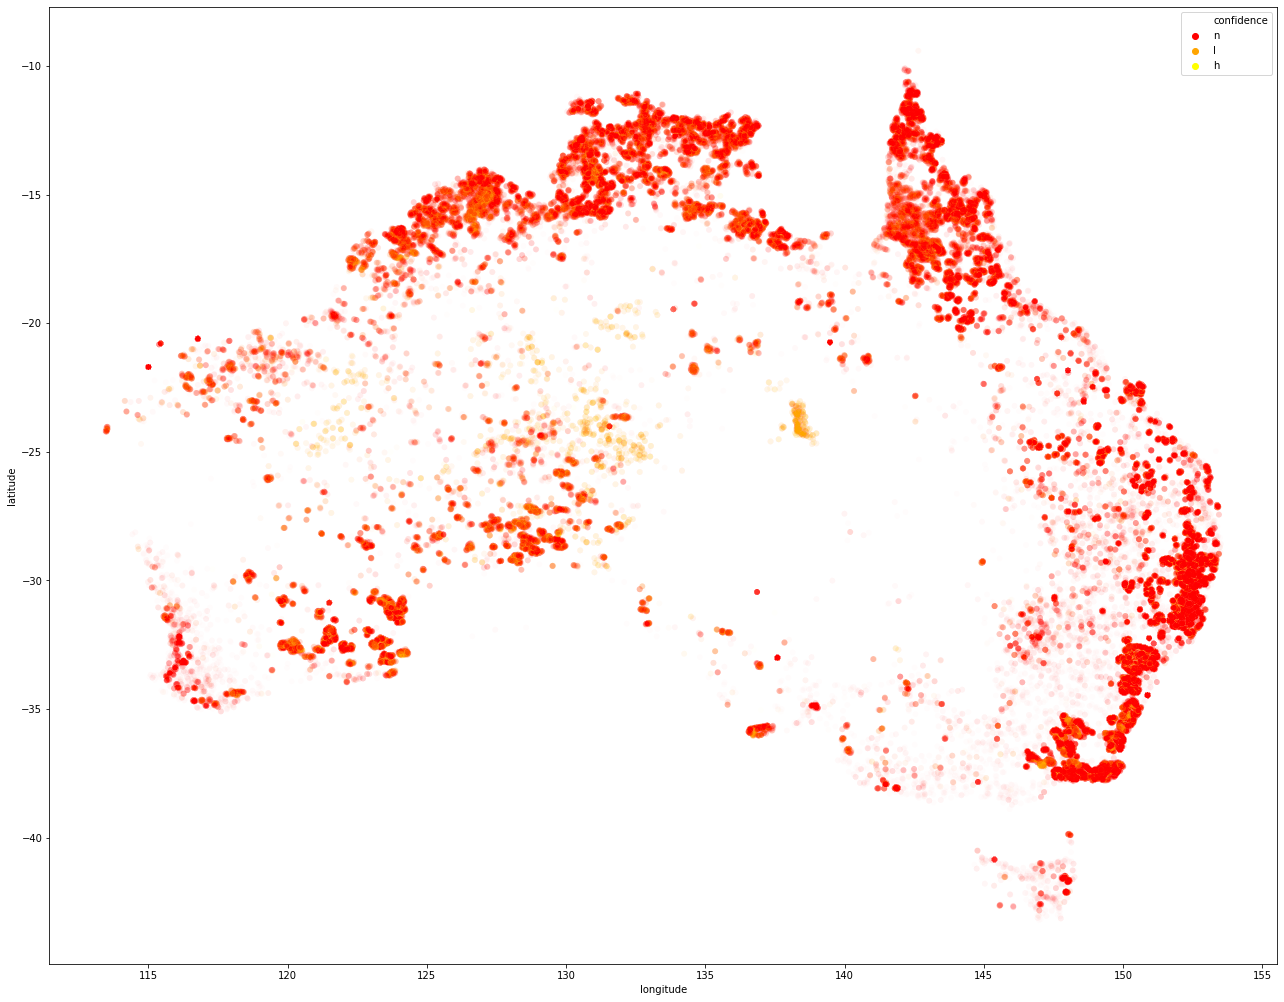

In [33]:
plt.figure(figsize = (22, 17.6))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
myColors = ['red', 'orange', 'yellow']
sns.scatterplot(x = 'longitude', y = 'latitude', 
                data = v1DF, alpha = 0.01, palette=myColors, 
                markers='+', hue = 'confidence')

The following Hexbin plot can further demonstrate the frequency of fire instances using colours. 

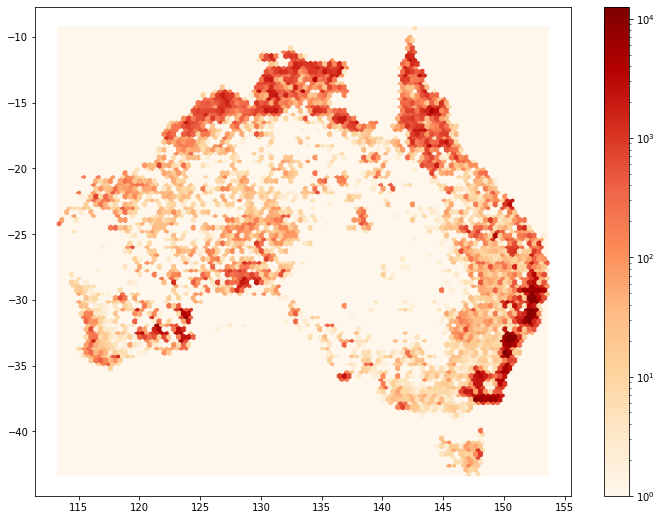

In [34]:
plt.figure(figsize=(12, 9))
plt.hexbin(v1DF.longitude, v1DF.latitude, bins = 'log', cmap="OrRd")
plt.colorbar()

Next, to adjust the map color according to the brightness of each fire, two different color palletes are used, and a pair of scatterplots are graphed to demonstrate the distribution of the instances of intense fires and moderate fires.

First, observe the distribution of brightness_i4 of all instances.

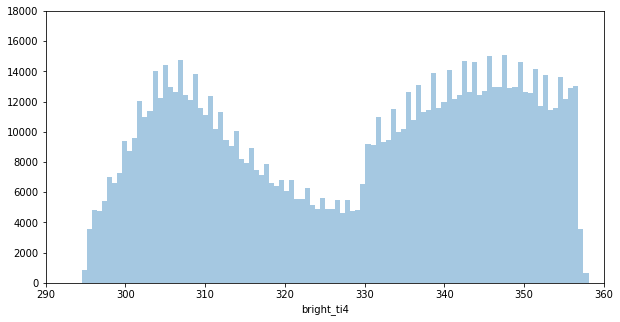

In [37]:
plt.figure(figsize=(10, 5))
plt.xlim(290, 360)
plt.ylim(0, 18000)
sns.distplot(a = v1DF['bright_ti4'],bins = 250, kde = False)

Judging from the distribution, a threshold of 330 can be used to categorize the fire instances to be intense or moderate. A pair of scatterplots are thus graphed accordingly.

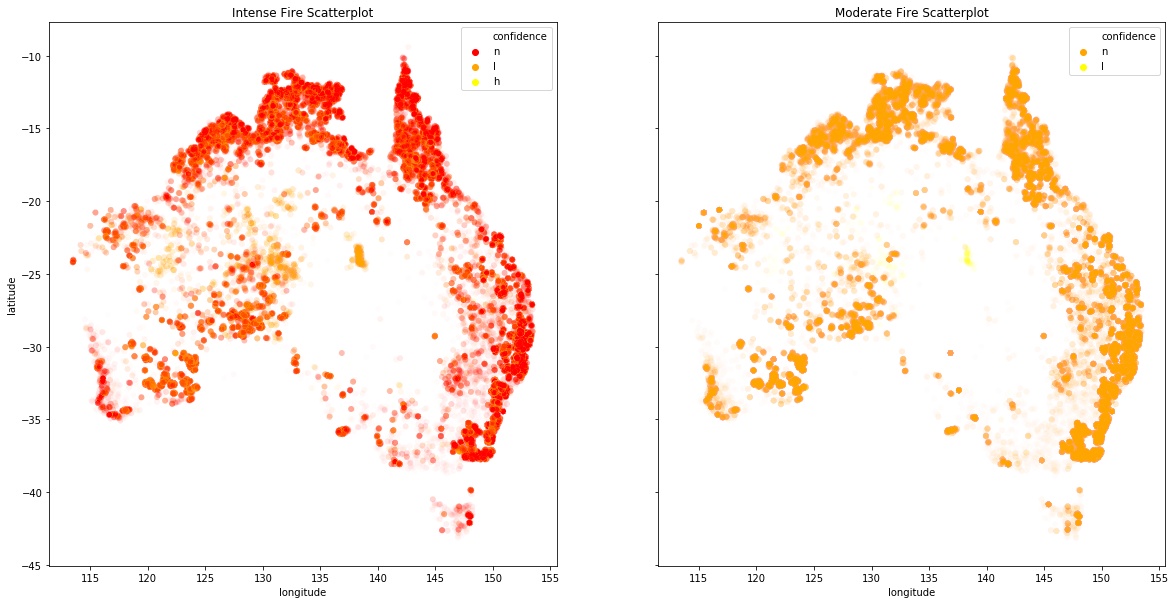

In [38]:
myColors = ['red', 'orange', 'yellow']
myColors2 = ['orange', 'yellow']
fig, (ax1, ax2) = plt.subplots(ncols = 2, sharey = True, figsize=(20, 10))
sns.scatterplot(x = 'longitude', y = 'latitude', 
                data = v1DF[v1DF['bright_ti4'] >= 330], alpha = 0.01, palette=myColors, 
                markers='+', hue = 'confidence', ax=ax1)
sns.scatterplot(x = 'longitude', y = 'latitude', 
                data = v1DF[v1DF['bright_ti4'] < 330], alpha = 0.01, palette=myColors2, 
                markers='+', hue = 'confidence', ax=ax2)
ax1.set_title('Intense Fire Scatterplot')
ax2.set_title('Moderate Fire Scatterplot')
plt.show()

It is easy to observe that the coastal areas of Northern Territory, Queensland, New South Wales suffer from both intense and moderate fires the most. 

Lastly, the following folium dynamic map demonstrates a random subset (5000) of the fire instances. 

In [40]:
import folium
# init map at Sydney
fireMap = folium.Map(location=[-33.8688, 151.2093], tiles='Stamen Terrain', zoom_start=4)

def mapColor(brightI4):
    if (float(brightI4) > 330):
        return 'red'
    else:
        return 'orange'

# Create a mechanism for color mapping
v1DF['brightnessMap'] = v1DF['bright_ti4'].apply(mapColor)
for i in range (0, 5000):
    folium.Circle(location=[v1DF.iloc[i]['latitude'], v1DF.iloc[i]['longitude']], 
                 radius = 40 * v1DF.iloc[i]['bright_ti4'],
                 color = v1DF.iloc[i]['brightnessMap']).add_to(fireMap)
v1DF.drop('brightnessMap', axis = 1, inplace = True)

fireMap

# Regression Modelling for Air Quality

Before constructing the models, the following scatterplots provide a brief exploratory analysis on the trend of various pollutants' concentration over the period of the target fire season.

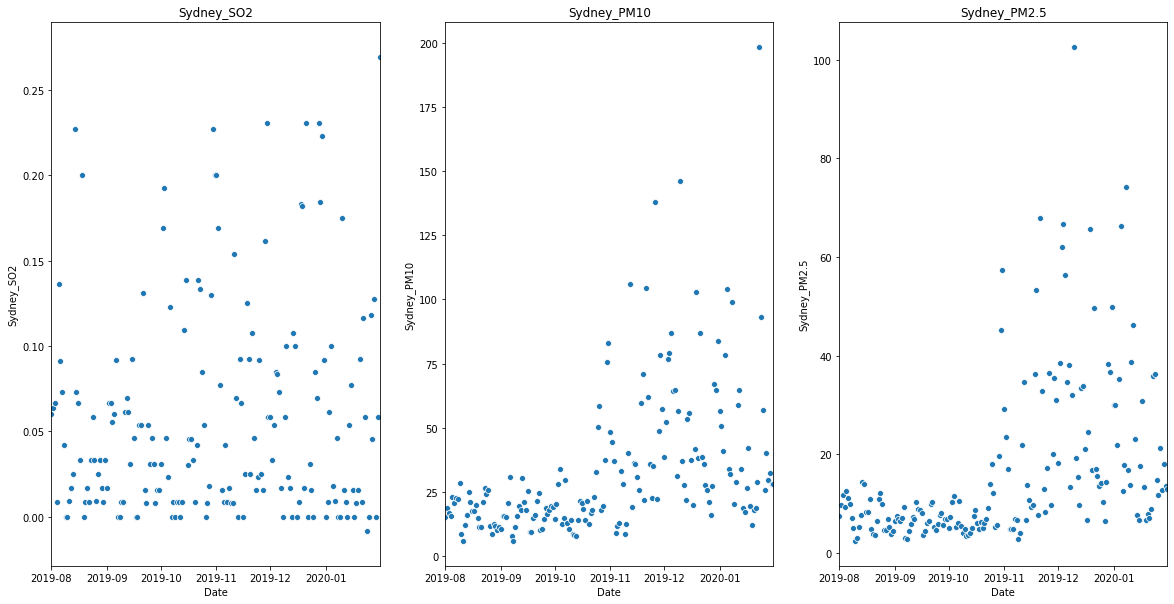

In [41]:
# For Sydney
from datetime import datetime
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize=(20, 10), sharex = True)
plt.xlim(datetime.strptime('2019/08/01', '%Y/%m/%d'), datetime.strptime('2020/01/31', '%Y/%m/%d'))
sns.scatterplot(x='Date', y='Sydney_SO2', data = sydney, ax=ax1)
sns.scatterplot(x='Date', y='Sydney_PM10', data = sydney, ax=ax2)
sns.scatterplot(x='Date', y = 'Sydney_PM2.5', data = sydney, ax = ax3)
ax1.set_title('Sydney_SO2')
ax2.set_title('Sydney_PM10')
ax3.set_title('Sydney_PM2.5')
plt.show()

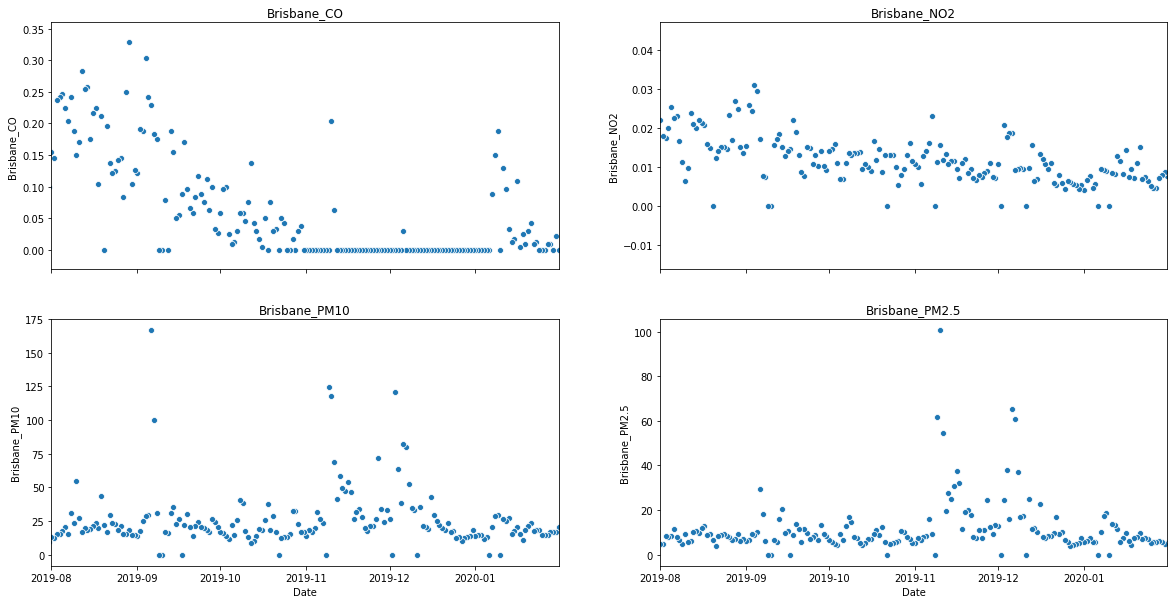

In [42]:
# For Brisbane:

# Since there are negative values in the dataset, we first clean the data.
brisbane['Brisbane_CO'] = brisbane['Brisbane_CO'].apply(lambda x: float(x) if float(x) >=0 else 0)
brisbane['Brisbane_NO2'] = brisbane['Brisbane_NO2'].apply(lambda x: float(x) if float(x) >=0 else 0)
brisbane['Brisbane_PM10'] = brisbane['Brisbane_PM10'].apply(lambda x: float(x) if float(x) >=0 else 0)
brisbane['Brisbane_PM2.5'] = brisbane['Brisbane_PM2.5'].apply(lambda x: float(x) if float(x) >=0 else 0)

# Graph the scatterplots
fig, axes = plt.subplots(2,2, figsize=(20, 10), sharex = True)
plt.xlim(datetime.strptime('2019/08/01', '%Y/%m/%d'), datetime.strptime('2020/01/31', '%Y/%m/%d'))
sns.scatterplot(x='Date', y='Brisbane_CO', data = brisbane, ax=axes[0, 0])
sns.scatterplot(x='Date', y='Brisbane_NO2', data = brisbane, ax=axes[0, 1])
sns.scatterplot(x='Date', y = 'Brisbane_PM10', data = brisbane, ax = axes[1, 0])
sns.scatterplot(x='Date', y = 'Brisbane_PM2.5', data = brisbane, ax = axes[1, 1])
axes[0, 0].set_title('Brisbane_CO')
axes[0, 1].set_title('Brisbane_NO2')
axes[1, 0].set_title('Brisbane_PM10')
axes[1, 1].set_title('Brisbane_PM2.5')
plt.show()

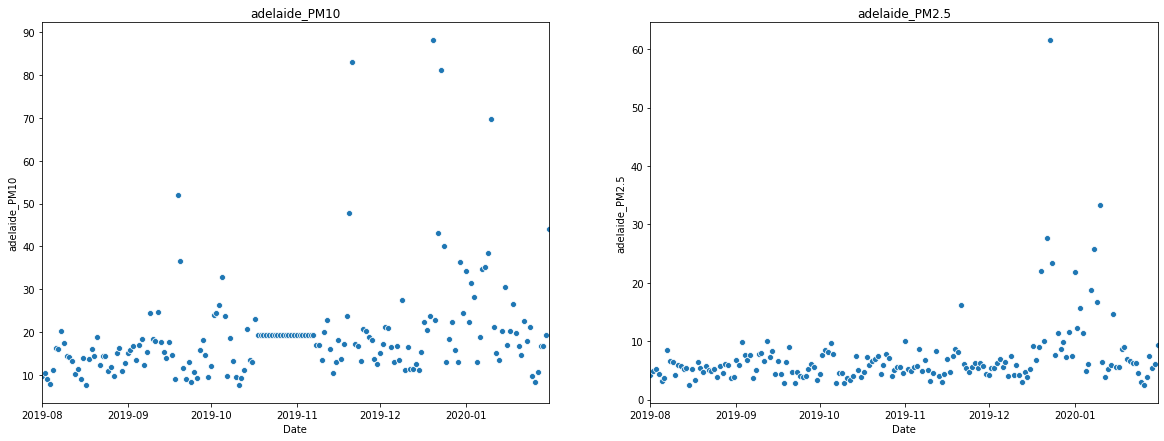

In [43]:
# For Adelaide
adelaide['adelaide_PM10'] = adelaide['adelaide_PM10'].fillna(adelaide['adelaide_PM10'].mean())
adelaide['adelaide_PM2.5'] = adelaide['adelaide_PM2.5'].fillna(adelaide['adelaide_PM2.5'].mean())
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(20, 7), sharex = True)
plt.xlim(datetime.strptime('2019/08/01', '%Y/%m/%d'), datetime.strptime('2020/01/31', '%Y/%m/%d'))
sns.scatterplot(x='Date', y='adelaide_PM10', data = adelaide, ax=ax1)
sns.scatterplot(x='Date', y='adelaide_PM2.5', data = adelaide, ax=ax2)
ax1.set_title('adelaide_PM10')
ax2.set_title('adelaide_PM2.5')
plt.show()

Next, the three air quality datasets are innerjoined by the "date" column, and a heatmap is constructed to visualize the correlations between the parameters.

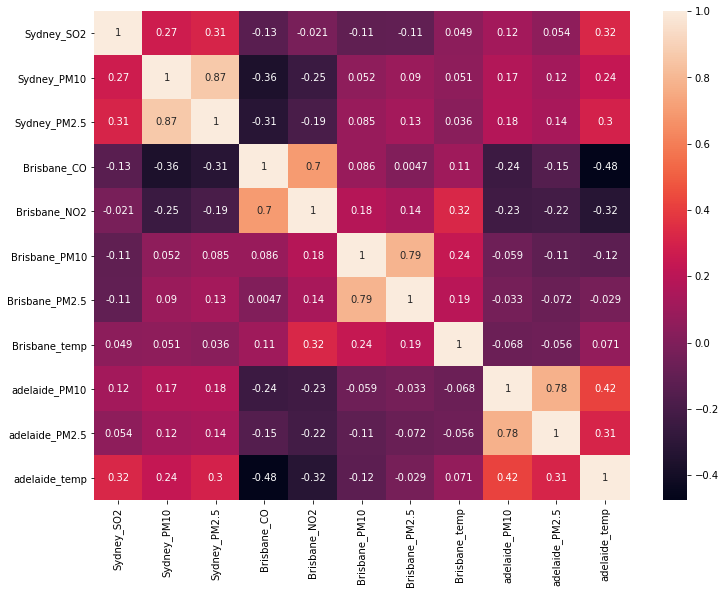

In [44]:
airQuality = pd.merge(sydney, brisbane, on='Date')
airQuality = pd.merge(airQuality, adelaide, on='Date')

plt.figure(figsize = (12, 9))
sns.heatmap(airQuality.corr(), annot = True)

In order to predict a city's air quality concentration based on fire data, it is necessary to map all fire instance's effect into our consideration. Factors such as location, intensity, and radiation emitted, must also be taken into account. Moreover, given a day, it is the best practice to consider all fire instances on that day, and some fire instances that occurred some days before (for pollutants to spread and travel). However, fire instances are likely to be persistant over days, and thus for simplicity, only the fire instances on that specific day of which the air quality is to be predicted are considered.

The following set of principles are thus defined:

For a given day $D$, assume that there are $n$ observed fire instances $f_{1}, ..., f_{n}$.

Let $d_{f} = ||(x_{city}, y_{city}), (x_{f}, y_{f})||$. That is, the distance between the fire location and the target city.

Define that: 
- confidence factor $c$: low = 1, nominal = 4, high = 6. 
- the fire distance factor $\sum_{i=1}^{n} \dfrac{200}{d_{f_{i}}}$.
- the brightness factor  $\sum_{i=1}^{n} \dfrac{c_{i}(I4_{i} + I5_{i})}{2d_{f_{i}}}$.
- the radiative power factor $\sum_{i=1}^{n} \dfrac{c_{i}frp_{i}}{d_{f_{i}}}$.

Given the coordinates of Sydney $(-33.8688, 151.2093)$, Brisbane $(-27.4698, 153.0251)$ and Adelaide $(-34.9285, 138.6007)$, the transformation above is applied to each city, adding 3 more columns to the v1DF dataframe for each city.

In [45]:
# Create a new dataframe to store all factors for every city.
v1Factors = pd.DataFrame(data = v1DF['Date'].unique())
v1Factors.columns = ['Date']

# Function to convert confidence level to confidence factor according to the rule defined
def convertConfidence(level):
    if (level == 'l'):
        return 1
    elif (level == 'n'):
        return 4
    elif (level == 'h'):
        return 6  
v1DF['confidence'] = v1DF['confidence'].apply(convertConfidence)

# Sydney: initiate empty columns
v1Factors['Sydney_distance'] = v1Factors['Date'].apply(lambda x: 0)
v1Factors['Sydney_brightness'] = v1Factors['Date'].apply(lambda x: 0)
v1Factors['Sydney_radiative'] = v1Factors['Date'].apply(lambda x: 0)
v1Factors.index = v1Factors['Date']

# Sydney: Calulate the factors as defined and store them in v1Factors dataframe
for index, row in v1DF.iterrows():
    x = float(row['latitude'])
    y = float(row['longitude'])
    dist = ((x - (0 - 33.8688))**2 + (y - 151.2093)**2)**0.5
    distFactor = 200/dist
    v1Factors.loc[row['Date'], 'Sydney_distance'] += distFactor
    
    b4 = float(row['bright_ti4'])
    b5 = float(row['bright_ti5'])
    c = row['confidence']
    bfactor = ((b4 + b5) * c) / (2 * distFactor)
    v1Factors.loc[row['Date'], 'Sydney_brightness'] += bfactor
    
    frp = float(row['frp'])
    frpFactor = frp * c / distFactor
    v1Factors.loc[row['Date'], 'Sydney_radiative'] += frpFactor
    
# Brisbane: initiate empty columns
v1Factors['Brisbane_distance'] = v1Factors['Date'].apply(lambda x: 0)
v1Factors['Brisbane_brightness'] = v1Factors['Date'].apply(lambda x: 0)
v1Factors['Brisbane_radiative'] = v1Factors['Date'].apply(lambda x: 0)

# Brisbane: Calculate the factors as defined and store them in v1Factors dataframe
for index, row in v1DF.iterrows():
    x = float(row['latitude'])
    y = float(row['longitude'])
    dist = ((x - (0 - 27.4698))**2 + (y - 153.0251)**2)**0.5
    distFactor = 200/dist
    v1Factors.loc[row['Date'], 'Brisbane_distance'] += distFactor
    
    b4 = float(row['bright_ti4'])
    b5 = float(row['bright_ti5'])
    c = row['confidence']
    bfactor = ((b4 + b5) * c) / (2 * distFactor)
    v1Factors.loc[row['Date'], 'Brisbane_brightness'] += bfactor
    
    frp = float(row['frp'])
    frpFactor = frp * c / distFactor
    v1Factors.loc[row['Date'], 'Brisbane_radiative'] += frpFactor

# Adelaide: initiate empty columns
v1Factors['Adelaide_distance'] = v1Factors['Date'].apply(lambda x: 0)
v1Factors['Adelaide_brightness'] = v1Factors['Date'].apply(lambda x: 0)
v1Factors['Adelaide_radiative'] = v1Factors['Date'].apply(lambda x: 0)

# Adelaide: Calculate the factors as defined and store them in v1Factors dataframe
for index, row in v1DF.iterrows():
    x = float(row['latitude'])
    y = float(row['longitude'])
    dist = ((x - (0 - 34.9285))**2 + (y - 138.6007)**2)**0.5
    distFactor = 200/dist
    v1Factors.loc[row['Date'], 'Adelaide_distance'] += distFactor
    
    b4 = float(row['bright_ti4'])
    b5 = float(row['bright_ti5'])
    c = row['confidence']
    bfactor = ((b4 + b5) * c) / (2 * distFactor)
    v1Factors.loc[row['Date'], 'Adelaide_brightness'] += bfactor
    
    frp = float(row['frp'])
    frpFactor = frp * c / distFactor
    v1Factors.loc[row['Date'], 'Adelaide_radiative'] += frpFactor

Next, the v1Factors dataframe is organized and merged with the airquality dataframe in order to explore some of the relationships between the fire instance parameters relative to each city, and each city's airquality, on a given day.

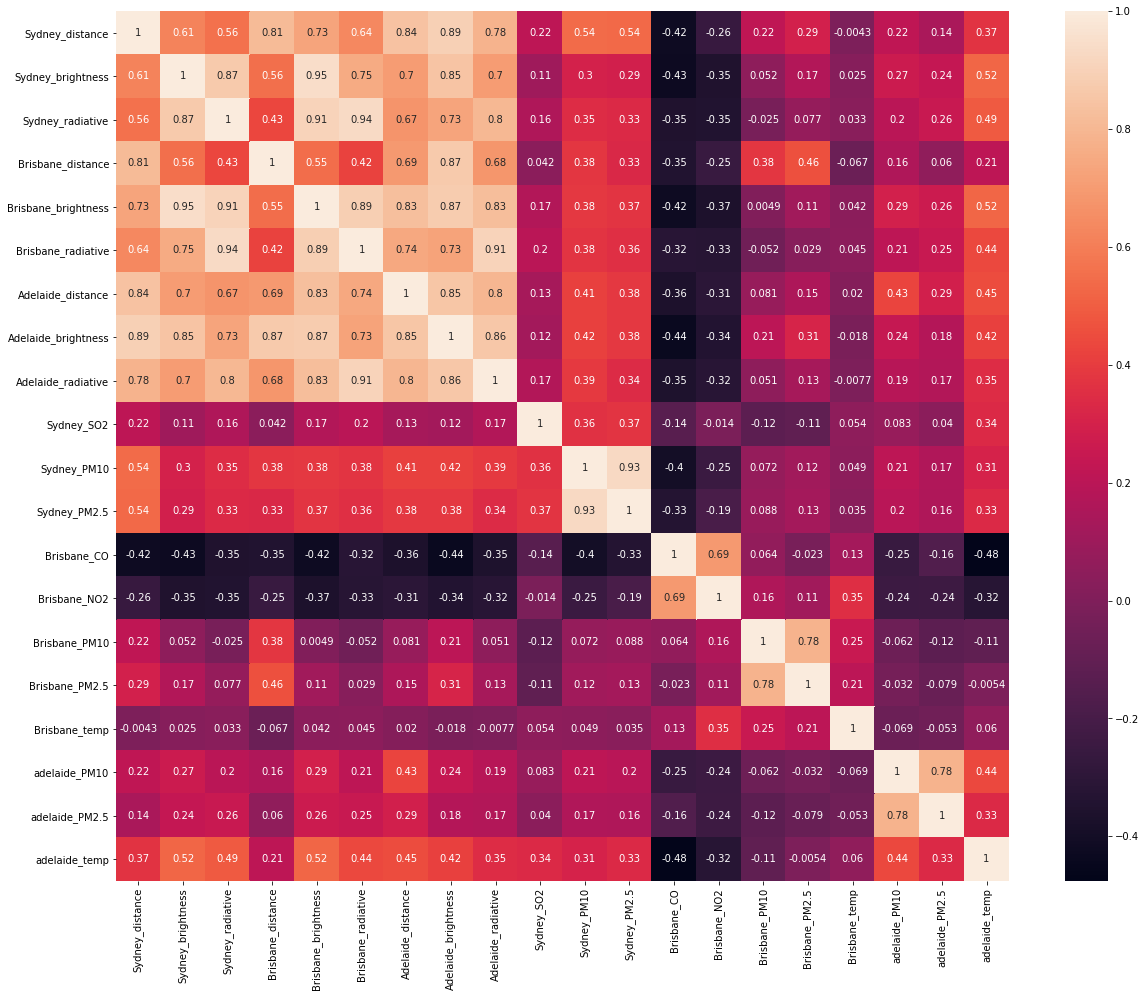

In [46]:
# Organize v1Factors
v1Factors.reset_index(drop=True, inplace=True)

# Merge it with air quality dataframe
v1 = pd.merge(v1Factors, airQuality, how='inner', on='Date')

# Construct heatmap to explore corelations
plt.figure(figsize = (20, 16))
sns.heatmap(v1.corr(), annot = True)

It can be observed that each city's PM2.5 concentration has the greatest correlation with the given fire factors on that day. Thus, for regression prediction, PM2.5 concentration is set to be the response variate to be predicted, and that the explanatory variates are the three factors: distance, brightness, and radiative.

First, various regression models are attempted to predict the Sydney's PM2.5 concentration.

In [47]:
from sklearn.model_selection import train_test_split
X = v1[['Sydney_distance', 'Sydney_brightness', 'Sydney_radiative']]
y = v1['Sydney_PM2.5']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

### SVR

In [48]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

MAE: 36517.60449185609
MSE: 2581245237.9926558
RMSE: 50805.956717619796


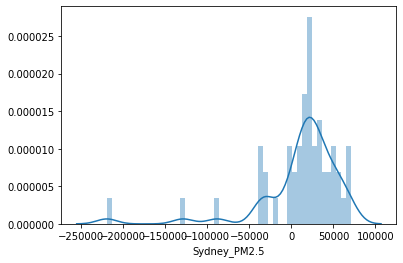

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
predictions = svr.predict(X_test)
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
sns.distplot(y_test - predictions, bins = 50)

This is an awful prediction. Switch to predict using radial basis function kernel.

In [50]:
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

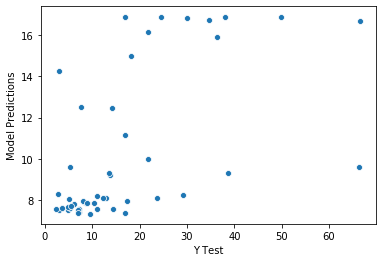

In [51]:
predDF = pd.DataFrame(y_test.values, columns=['Y Test'])
prediction = pd.Series(predictions.reshape(50,))
predDF = pd.concat([predDF, prediction], axis = 1)
predDF.columns = ['Y Test','Model Predictions']
sns.scatterplot(x='Y Test', y = 'Model Predictions', data = predDF)

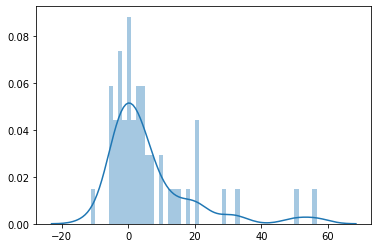

In [52]:
sns.distplot(predDF['Y Test'] - predDF['Model Predictions'], bins = 50)

In [53]:
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

MAE: 8.608335182243197
MSE: 212.3180805500867
RMSE: 14.57113861543039


In [54]:
v1.describe()

Sydney_distance  Sydney_brightness  Sydney_radiative  \
count     1.640000e+02       1.640000e+02        164.000000   
mean      3.232588e+05       6.174310e+05      30308.958841   
std       4.625327e+05       3.896765e+05      33437.310413   
min       2.045756e+04       1.133697e+05       2537.141448   
25%       4.419046e+04       3.354608e+05      10232.075358   
50%       1.015393e+05       5.456670e+05      20625.881359   
75%       4.199602e+05       7.596404e+05      34204.140591   
max       2.358185e+06       2.304220e+06     236413.646454   

       Brisbane_distance  Brisbane_brightness  Brisbane_radiative  \
count       1.640000e+02         1.640000e+02          164.000000   
mean        2.194377e+05         6.290566e+05        33001.654294   
std         2.573482e+05         4.934066e+05        46511.268317   
min         2.053980e+04         9.198764e+04         2125.534323   
25%         5.584784e+04         3.071809e+05         9103.531891   
50%         1.047399e+05         5.062871e+05        18942.647403   
75%         3.014393e+05         7.637888e+05        34583.047971   
max         1.890824e+06         2.887091e+06       337642.023983   

       Adelaide_distance  Adelaide_brightness  Adelaide_radiative  Sydney_SO2  \
count         164.000000         1.640000e+02          164.000000  164.000000   
mean       101847.840028         6.902808e+05        31251.031724    0.057957   
std        128176.327839         5.235179e+05        39671.380264    0.060978   
min         12166.753206         1.242757e+05         2079.205822    0.000000   
25%         33349.161533         3.201932e+05         9687.997771    0.008902   
50%         52801.643571         5.220309e+05        21002.936454    0.033333   
75%        116083.790148         9.075636e+05        37798.735204    0.084615   
max        939495.078799         2.636714e+06       336184.947108    0.230769   

       Sydney_PM10  Sydney_PM2.5  Brisbane_CO  Brisbane_NO2  Brisbane_PM10  \
count   164.000000    164.000000   164.000000    164.000000     164.000000   
mean     32.536502     16.312122     0.067290      0.012125      26.546914   
std      26.178694     17.018426     0.085486      0.006176      22.876848   
min       5.871429      2.384766     0.000000      0.000000       0.000000   
25%      15.470313      6.065534     0.000000      0.007917      15.313542   
50%      22.092279      9.482215     0.027627      0.011383      20.777083   
75%      38.427665     17.970703     0.121875      0.015240      29.610417   
max     146.028571    102.557143     0.329167      0.030917     167.033333   

       Brisbane_PM2.5  Brisbane_temp  adelaide_PM10  adelaide_PM2.5  \
count      164.000000     164.000000     164.000000      164.000000   
mean        11.987992      -8.028930      19.328424        7.241371   
std         12.600308     135.348378      12.298444        6.229902   
min          0.000000    -817.945833       7.465217        2.412500   
25%          6.260417      19.246875      12.951875        4.535417   
50%          8.485417      22.434330      16.900000        5.752083   
75%         12.381250      25.436458      20.032292        7.512648   
max        100.825000      30.279167      88.333333       61.620833   

       adelaide_temp  
count     164.000000  
mean       17.231596  
std         6.151682  
min         7.829167  
25%        12.837500  
50%        15.704167  
75%        19.662500  
max        34.162500

Note that Sydney's PM2.5 concentration has a mean of 16.3121, so the RMSE is greater than 50% for any of the SVR methods. Next, linear regression is attempted.

### Linear Regression

Text(0, 0.5, 'predictions')

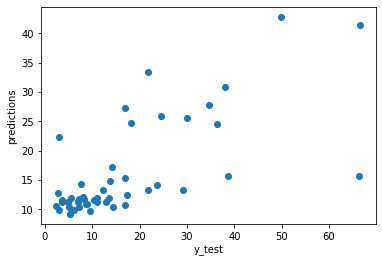

In [55]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel('y_test')
plt.ylabel('predictions')

MAE: 7.1893674930839735
MSE: 118.08008606512745
RMSE: 10.86646612589058


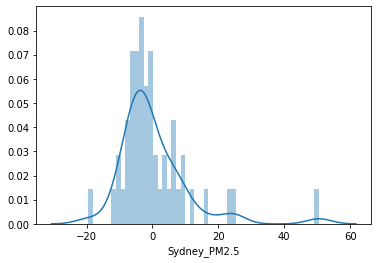

In [56]:
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
sns.distplot(y_test - predictions, bins = 50)

The RMSE of this model's prediction is slightly better than that of the previous models. Next, ANN models are explored in seek of better predictions.

### ANN

First, scale the data.

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape, X_test.shape

((114, 3), (50, 3))

Among the possible choices, rmsprop optimizer with early stopping but without dropout layers is attempted.

In [58]:
# first look at rmsprop with earlystopping/without dropout.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(Dense(3, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))

model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse')

In [59]:
earlyStop = EarlyStopping(monitor='val_loss', mode = 'min', verbose = 1, patience=5)
model.fit(x = X_train, 
          y = y_train.values, 
          validation_data=(X_test, y_test.values),
          batch_size = 16, 
          epochs=500,
          verbose = 1,
          callbacks = [earlyStop])

Train on 114 samples, validate on 50 samples
Epoch 1/500
114/114 [==============================] - 0s 3ms/sample - loss: 581.3988 - val_loss: 487.6170
Epoch 2/500
114/114 [==============================] - 0s 118us/sample - loss: 580.1480 - val_loss: 486.5330
Epoch 3/500
114/114 [==============================] - 0s 109us/sample - loss: 579.0796 - val_loss: 485.1913
Epoch 4/500
114/114 [==============================] - 0s 113us/sample - loss: 577.6596 - val_loss: 483.8521
Epoch 5/500
114/114 [==============================] - 0s 130us/sample - loss: 575.9197 - val_loss: 482.5229
Epoch 6/500
114/114 [==============================] - 0s 128us/sample - loss: 574.3258 - val_loss: 481.0097
Epoch 7/500
114/114 [==============================] - 0s 129us/sample - loss: 572.5659 - val_loss: 479.1231
Epoch 8/500
114/114 [==============================] - 0s 139us/sample - loss: 570.4493 - val_loss: 477.1631
Epoch 9/500
114/114 [==============================] - 0s 123us/sample - loss: 568.22

114/114 [==============================] - 0s 124us/sample - loss: 373.3510 - val_loss: 283.1047
Epoch 76/500
114/114 [==============================] - 0s 122us/sample - loss: 370.1854 - val_loss: 279.3236
Epoch 77/500
114/114 [==============================] - 0s 122us/sample - loss: 366.4522 - val_loss: 276.3961
Epoch 78/500
114/114 [==============================] - 0s 117us/sample - loss: 363.2935 - val_loss: 272.5296
Epoch 79/500
114/114 [==============================] - 0s 122us/sample - loss: 359.4666 - val_loss: 268.6854
Epoch 80/500
114/114 [==============================] - 0s 122us/sample - loss: 355.9782 - val_loss: 266.7425
Epoch 81/500
114/114 [==============================] - 0s 124us/sample - loss: 353.7864 - val_loss: 264.2144
Epoch 82/500
114/114 [==============================] - 0s 119us/sample - loss: 351.1132 - val_loss: 260.3900
Epoch 83/500
114/114 [==============================] - 0s 120us/sample - loss: 347.6011 - val_loss: 258.4060
Epoch 84/500
114/114 [=

114/114 [==============================] - 0s 258us/sample - loss: 272.1813 - val_loss: 181.1021
Epoch 150/500
114/114 [==============================] - 0s 262us/sample - loss: 271.9600 - val_loss: 180.8693
Epoch 151/500
114/114 [==============================] - 0s 242us/sample - loss: 271.9288 - val_loss: 180.7693
Epoch 152/500
114/114 [==============================] - 0s 287us/sample - loss: 271.8118 - val_loss: 180.6916
Epoch 153/500
114/114 [==============================] - 0s 398us/sample - loss: 271.8549 - val_loss: 180.3268
Epoch 154/500
114/114 [==============================] - 0s 489us/sample - loss: 271.6113 - val_loss: 180.2540
Epoch 155/500
114/114 [==============================] - 0s 454us/sample - loss: 271.5425 - val_loss: 180.1085
Epoch 156/500
114/114 [==============================] - 0s 484us/sample - loss: 271.3833 - val_loss: 179.8671
Epoch 157/500
114/114 [==============================] - 0s 347us/sample - loss: 271.2308 - val_loss: 179.6040
Epoch 158/500
1

Epoch 223/500
114/114 [==============================] - 0s 150us/sample - loss: 266.1607 - val_loss: 172.4352
Epoch 224/500
114/114 [==============================] - 0s 160us/sample - loss: 266.2060 - val_loss: 172.3621
Epoch 225/500
114/114 [==============================] - 0s 166us/sample - loss: 266.0806 - val_loss: 172.1080
Epoch 226/500
114/114 [==============================] - 0s 155us/sample - loss: 265.9069 - val_loss: 172.0996
Epoch 227/500
114/114 [==============================] - 0s 155us/sample - loss: 266.0103 - val_loss: 172.1056
Epoch 228/500
114/114 [==============================] - 0s 153us/sample - loss: 265.9427 - val_loss: 172.0167
Epoch 229/500
114/114 [==============================] - 0s 153us/sample - loss: 265.8798 - val_loss: 171.9659
Epoch 230/500
114/114 [==============================] - 0s 160us/sample - loss: 265.8123 - val_loss: 171.7830
Epoch 231/500
114/114 [==============================] - 0s 152us/sample - loss: 265.5874 - val_loss: 171.7641
E

Epoch 297/500
114/114 [==============================] - 0s 134us/sample - loss: 261.7772 - val_loss: 165.6713
Epoch 298/500
114/114 [==============================] - 0s 125us/sample - loss: 261.8170 - val_loss: 165.6226
Epoch 299/500
114/114 [==============================] - 0s 121us/sample - loss: 261.8593 - val_loss: 165.6849
Epoch 300/500
114/114 [==============================] - 0s 122us/sample - loss: 261.7316 - val_loss: 165.6904
Epoch 301/500
114/114 [==============================] - 0s 120us/sample - loss: 261.7992 - val_loss: 165.6709
Epoch 302/500
114/114 [==============================] - 0s 120us/sample - loss: 261.7576 - val_loss: 165.7232
Epoch 303/500
114/114 [==============================] - 0s 117us/sample - loss: 261.6188 - val_loss: 165.6205
Epoch 304/500
114/114 [==============================] - 0s 127us/sample - loss: 261.6167 - val_loss: 165.5339
Epoch 305/500
114/114 [==============================] - 0s 143us/sample - loss: 261.7790 - val_loss: 165.5452
E

Epoch 371/500
114/114 [==============================] - 0s 153us/sample - loss: 258.4689 - val_loss: 160.1457
Epoch 372/500
114/114 [==============================] - 0s 159us/sample - loss: 258.3339 - val_loss: 160.1134
Epoch 373/500
114/114 [==============================] - 0s 148us/sample - loss: 258.2812 - val_loss: 160.0689
Epoch 374/500
114/114 [==============================] - 0s 156us/sample - loss: 258.3917 - val_loss: 160.0948
Epoch 375/500
114/114 [==============================] - 0s 152us/sample - loss: 258.3350 - val_loss: 160.0289
Epoch 376/500
114/114 [==============================] - 0s 151us/sample - loss: 258.4516 - val_loss: 159.9522
Epoch 377/500
114/114 [==============================] - 0s 151us/sample - loss: 258.2028 - val_loss: 159.9457
Epoch 378/500
114/114 [==============================] - 0s 150us/sample - loss: 258.1487 - val_loss: 159.9810
Epoch 379/500
114/114 [==============================] - 0s 154us/sample - loss: 258.1798 - val_loss: 159.9112
E

Monitor the training:

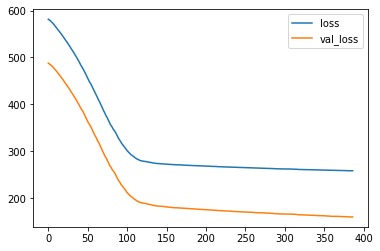

In [60]:
modelLoss = pd.DataFrame(model.history.history)
modelLoss.plot()

In [61]:
trainScore = model.evaluate(X_train, y_train, verbose = 0)
testScore = model.evaluate(X_test, y_test, verbose = 0)
trainScore, testScore

(257.7300211588542, 159.36347900390626)

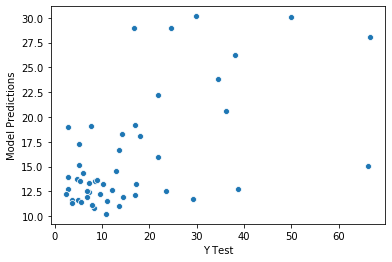

In [62]:
prediction = model.predict(X_test)
predDF = pd.DataFrame(y_test.values, columns=['Y Test'])
prediction = pd.Series(prediction.reshape(50,))
predDF = pd.concat([predDF, prediction], axis = 1)
predDF.columns = ['Y Test','Model Predictions']
sns.scatterplot(x='Y Test', y = 'Model Predictions', data = predDF)

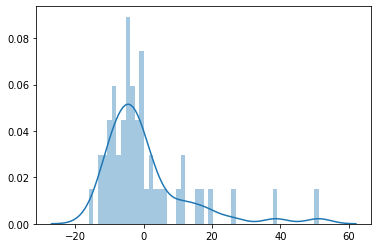

In [63]:
sns.distplot(predDF['Y Test'] - predDF['Model Predictions'], bins = 50)

In [64]:
# MAE, MSE, RMSE
print(mean_absolute_error(predDF['Y Test'],predDF['Model Predictions']))
print(mean_squared_error(predDF['Y Test'],predDF['Model Predictions']))
print(np.sqrt(mean_squared_error(predDF['Y Test'],predDF['Model Predictions'])))

8.58002998600752
159.36346625757722
12.62392436041888


The prediction is worse than the linear regression model. Thus, dropout layers are added.

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(Dense(3, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(3, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(3, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse')

In [68]:
earlyStop = EarlyStopping(monitor='val_loss', mode = 'min', verbose = 1, patience=5)
model.fit(x = X_train, 
          y = y_train.values, 
          validation_data=(X_test, y_test.values),
          batch_size = 16, 
          epochs=500,
          verbose = 1,
          callbacks = [earlyStop])

Train on 114 samples, validate on 50 samples
Epoch 1/500
114/114 [==============================] - 0s 4ms/sample - loss: 580.9731 - val_loss: 487.5412
Epoch 2/500
114/114 [==============================] - 0s 120us/sample - loss: 579.6876 - val_loss: 486.7914
Epoch 3/500
114/114 [==============================] - 0s 113us/sample - loss: 578.9992 - val_loss: 486.1074
Epoch 4/500
114/114 [==============================] - 0s 125us/sample - loss: 578.6813 - val_loss: 485.3888
Epoch 5/500
114/114 [==============================] - 0s 132us/sample - loss: 577.9345 - val_loss: 484.7264
Epoch 6/500
114/114 [==============================] - 0s 138us/sample - loss: 576.4462 - val_loss: 483.9107
Epoch 7/500
114/114 [==============================] - 0s 136us/sample - loss: 575.8737 - val_loss: 482.9726
Epoch 8/500
114/114 [==============================] - 0s 148us/sample - loss: 574.3286 - val_loss: 482.2112
Epoch 9/500
114/114 [==============================] - 0s 134us/sample - loss: 574.77

114/114 [==============================] - 0s 149us/sample - loss: 416.1377 - val_loss: 304.3445
Epoch 76/500
114/114 [==============================] - 0s 150us/sample - loss: 425.4932 - val_loss: 301.6862
Epoch 77/500
114/114 [==============================] - 0s 131us/sample - loss: 400.2142 - val_loss: 298.0165
Epoch 78/500
114/114 [==============================] - 0s 136us/sample - loss: 434.2335 - val_loss: 295.8303
Epoch 79/500
114/114 [==============================] - 0s 134us/sample - loss: 365.6008 - val_loss: 292.1435
Epoch 80/500
114/114 [==============================] - 0s 139us/sample - loss: 371.0606 - val_loss: 288.1369
Epoch 81/500
114/114 [==============================] - 0s 134us/sample - loss: 406.4801 - val_loss: 285.6722
Epoch 82/500
114/114 [==============================] - 0s 136us/sample - loss: 398.4006 - val_loss: 282.3437
Epoch 83/500
114/114 [==============================] - 0s 135us/sample - loss: 400.5402 - val_loss: 279.3399
Epoch 84/500
114/114 [=

Monitor the training:

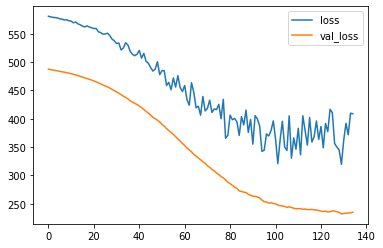

In [69]:
modelLoss = pd.DataFrame(model.history.history)
modelLoss.plot()

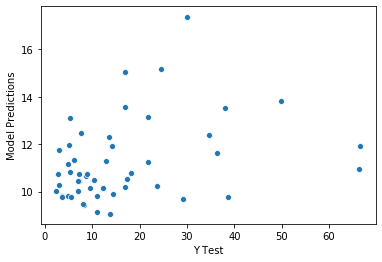

In [71]:
prediction = model.predict(X_test)
predDF = pd.DataFrame(y_test.values, columns=['Y Test'])
prediction = pd.Series(prediction.reshape(50,))
predDF = pd.concat([predDF, prediction], axis = 1)
predDF.columns = ['Y Test','Model Predictions']
sns.scatterplot(x='Y Test', y = 'Model Predictions', data = predDF)

In [72]:
# MAE, MSE, RMSE
print(mean_absolute_error(predDF['Y Test'],predDF['Model Predictions']))
print(mean_squared_error(predDF['Y Test'],predDF['Model Predictions']))
print(np.sqrt(mean_squared_error(predDF['Y Test'],predDF['Model Predictions'])))

9.523432712474927
235.0596653987377
15.331655663976337


This is a lot worse than the linear regression model. Next, the Adam optimizer is attempted without dropout layers.

In [75]:
model = Sequential()

model.add(Dense(3, activation = 'relu'))

model.add(Dense(3, activation = 'relu'))

model.add(Dense(3, activation = 'relu'))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [76]:
earlyStop = EarlyStopping(monitor='val_loss', mode = 'min', verbose = 1, patience=5)
model.fit(x = X_train, 
          y = y_train.values, 
          validation_data=(X_test, y_test.values),
          batch_size = 16, 
          epochs=500,
          verbose = 1,
          callbacks = [earlyStop])

Train on 114 samples, validate on 50 samples
Epoch 1/500
114/114 [==============================] - 0s 3ms/sample - loss: 579.4671 - val_loss: 484.3297
Epoch 2/500
114/114 [==============================] - 0s 278us/sample - loss: 577.8202 - val_loss: 482.5140
Epoch 3/500
114/114 [==============================] - 0s 281us/sample - loss: 576.1201 - val_loss: 480.6156
Epoch 4/500
114/114 [==============================] - 0s 273us/sample - loss: 574.3195 - val_loss: 478.6852
Epoch 5/500
114/114 [==============================] - 0s 294us/sample - loss: 572.4324 - val_loss: 476.6676
Epoch 6/500
114/114 [==============================] - 0s 288us/sample - loss: 570.4401 - val_loss: 474.4522
Epoch 7/500
114/114 [==============================] - 0s 270us/sample - loss: 568.3175 - val_loss: 472.0784
Epoch 8/500
114/114 [==============================] - 0s 227us/sample - loss: 566.0676 - val_loss: 469.6457
Epoch 9/500
114/114 [==============================] - 0s 231us/sample - loss: 563.75

114/114 [==============================] - 0s 139us/sample - loss: 267.5103 - val_loss: 165.8356
Epoch 76/500
114/114 [==============================] - 0s 132us/sample - loss: 267.0220 - val_loss: 165.5317
Epoch 77/500
114/114 [==============================] - 0s 126us/sample - loss: 266.7886 - val_loss: 165.1301
Epoch 78/500
114/114 [==============================] - 0s 140us/sample - loss: 266.5521 - val_loss: 164.8136
Epoch 79/500
114/114 [==============================] - 0s 134us/sample - loss: 266.1838 - val_loss: 164.4942
Epoch 80/500
114/114 [==============================] - 0s 139us/sample - loss: 265.9313 - val_loss: 164.0299
Epoch 81/500
114/114 [==============================] - 0s 133us/sample - loss: 265.4926 - val_loss: 163.7858
Epoch 82/500
114/114 [==============================] - 0s 132us/sample - loss: 265.2798 - val_loss: 163.6914
Epoch 83/500
114/114 [==============================] - 0s 139us/sample - loss: 265.2922 - val_loss: 163.6401
Epoch 84/500
114/114 [=

114/114 [==============================] - 0s 116us/sample - loss: 258.8365 - val_loss: 154.9977
Epoch 150/500
114/114 [==============================] - 0s 113us/sample - loss: 258.7879 - val_loss: 154.9079
Epoch 151/500
114/114 [==============================] - 0s 110us/sample - loss: 258.7276 - val_loss: 154.7806
Epoch 152/500
114/114 [==============================] - 0s 111us/sample - loss: 258.6158 - val_loss: 154.6835
Epoch 153/500
114/114 [==============================] - 0s 112us/sample - loss: 258.6374 - val_loss: 154.5830
Epoch 154/500
114/114 [==============================] - 0s 108us/sample - loss: 258.5185 - val_loss: 154.4555
Epoch 155/500
114/114 [==============================] - 0s 110us/sample - loss: 258.4022 - val_loss: 154.3386
Epoch 156/500
114/114 [==============================] - 0s 117us/sample - loss: 258.3196 - val_loss: 154.2050
Epoch 157/500
114/114 [==============================] - 0s 117us/sample - loss: 258.1603 - val_loss: 154.0759
Epoch 158/500
1

Epoch 223/500
114/114 [==============================] - 0s 113us/sample - loss: 253.9015 - val_loss: 147.5909
Epoch 224/500
114/114 [==============================] - 0s 119us/sample - loss: 253.6643 - val_loss: 147.4087
Epoch 225/500
114/114 [==============================] - 0s 111us/sample - loss: 254.0614 - val_loss: 147.3277
Epoch 226/500
114/114 [==============================] - 0s 113us/sample - loss: 253.7484 - val_loss: 147.2351
Epoch 227/500
114/114 [==============================] - 0s 112us/sample - loss: 253.6641 - val_loss: 147.1505
Epoch 228/500
114/114 [==============================] - 0s 119us/sample - loss: 253.6715 - val_loss: 147.1281
Epoch 229/500
114/114 [==============================] - 0s 121us/sample - loss: 253.7015 - val_loss: 147.1290
Epoch 230/500
114/114 [==============================] - 0s 118us/sample - loss: 253.7619 - val_loss: 147.1124
Epoch 231/500
114/114 [==============================] - 0s 120us/sample - loss: 253.5375 - val_loss: 147.0394
E

Monitor the training:

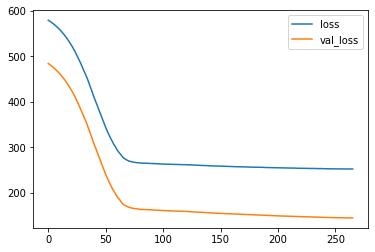

In [77]:
modelLoss = pd.DataFrame(model.history.history)
modelLoss.plot()

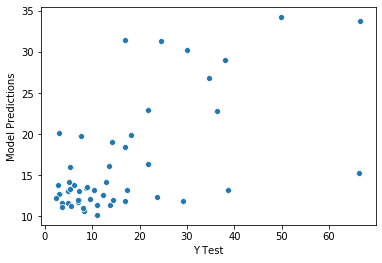

In [78]:
prediction = model.predict(X_test)
predDF = pd.DataFrame(y_test.values, columns=['Y Test'])
prediction = pd.Series(prediction.reshape(50,))
predDF = pd.concat([predDF, prediction], axis = 1)
predDF.columns = ['Y Test','Model Predictions']
sns.scatterplot(x='Y Test', y = 'Model Predictions', data = predDF)

In [79]:
# MAE, MSE, RMSE
print(mean_absolute_error(predDF['Y Test'],predDF['Model Predictions']))
print(mean_squared_error(predDF['Y Test'],predDF['Model Predictions']))
print(np.sqrt(mean_squared_error(predDF['Y Test'],predDF['Model Predictions'])))

8.247782170168538
144.96746927716677
12.040243738279004


The result indicates that none of the ANN models can produce a better prediction than the linear regression model, which has a RMSE of 10.866, accounting for 66.6% of the mean (16.3121). This error is significant, indicating that the dataset, which only has 164 days (instances), is not quite useful to predict Sydney's air quality.

Moreoever, similar analysis is applied to both Brisbane and Adelaide's record data, and the data was not shown useful. Specifically, the best model for both cities is still the linear regression model. For Brisbane, it has RMSE = 10.7986, accounting for an astounding 90% of its mean; for Adelaide, it has RMSE = 5.9336, which also accounts for 82% of its mean. 

As a conclusion, it is observed that the factors are difficult to predict the concentration of pollutants using regression/ANN. In the following, pollutant concentrations are categorized into levels, and classification models are attempted to predict the air quality level of a city on a day, given the distance, brightness, and radiation factors.

# Classification Modelling for Air Quality Levels

The levels of PM2.5 is defined by [U.S. Environmental Protection Agency](https://blissair.com/what-is-pm-2-5.htm):
- [0, 12] = Good
- [12.1 , 35.4] = Moderate
- [35.5, 55.4] = Unhealthy to sensitive groups
- [55.5 - 150.4] = Unhealthy
- 150 and up = Very unhealthy or hazardous.

The levels of PM10 is defined by [Environment Protection Authority Victoria](https://www.epa.vic.gov.au/for-community/environmental-information/air-quality/pm10-particles-in-the-air):
- [0, 40] = Good
- [40.1 , 80] = Moderate
- [80.1, 120] = Poor
- [120.1 - 240] = Very poor
- 240.1 and up = Hazardous

In the following, 6 columns are created for PM2.5 and PM10 levels of the three cities by mapping the level schemes above.

In [80]:
# Functions
def categorize2_5(num):
    if num < 12:
        return 0
    elif num < 35.4:
        return 1
    elif num < 55.4:
        return 2
    else:
        return 3
    
def categorize10(num):
    if num < 40:
        return 0
    elif num < 80:
        return 1
    elif num < 120:
        return 2
    else:
        return 3

# Apply the functions
v1['Sydney_PM2.5_cat'] = v1['Sydney_PM2.5'].apply(categorize2_5)
v1['Sydney_PM10_cat'] = v1['Sydney_PM10'].apply(categorize10)
v1['Brisbane_PM2.5_cat'] = v1['Brisbane_PM2.5'].apply(categorize2_5)
v1['Brisbane_PM10_cat'] = v1['Brisbane_PM10'].apply(categorize10)
v1['Adelaide_PM2.5_cat'] = v1['adelaide_PM2.5'].apply(categorize2_5)
v1['Adelaide_PM10_cat'] = v1['adelaide_PM10'].apply(categorize10)

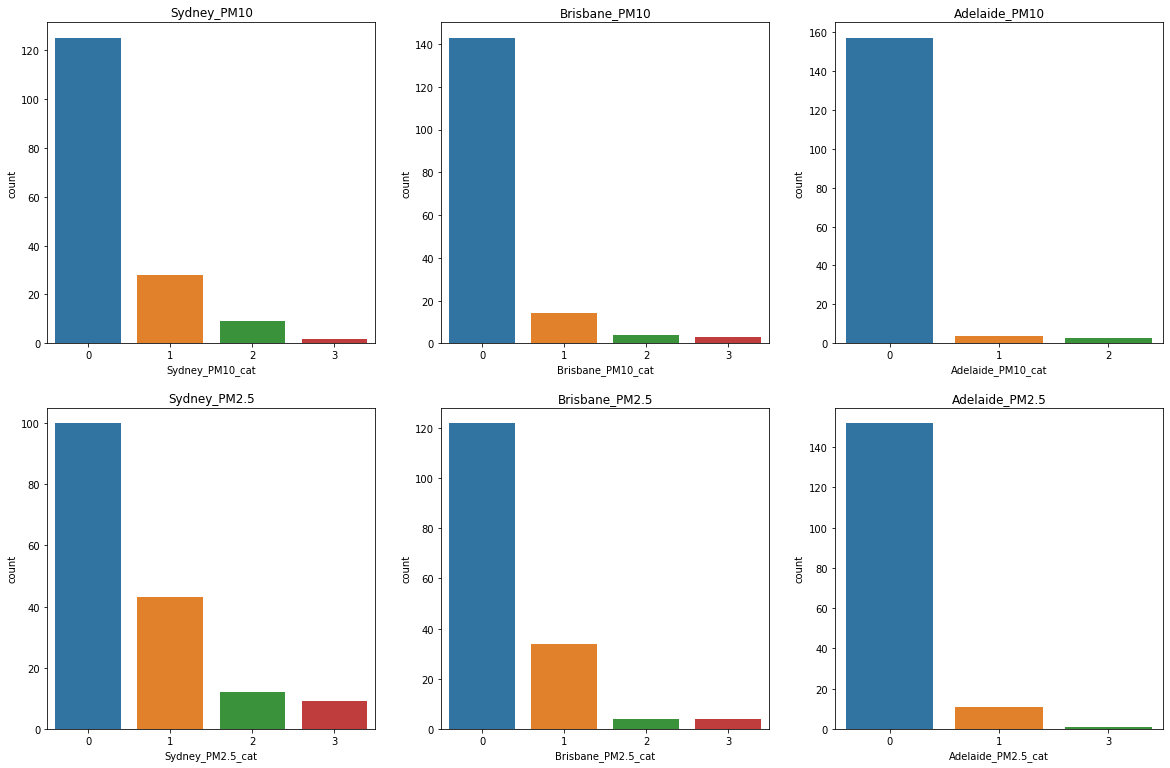

In [81]:
fig, axes = plt.subplots(2, 3, figsize=(20, 13))
plt.xlim(datetime.strptime('2019/08/01', '%Y/%m/%d'), datetime.strptime('2020/01/31', '%Y/%m/%d'))
sns.countplot(x = 'Sydney_PM10_cat', data = v1, ax=axes[0, 0])
sns.countplot(x = 'Brisbane_PM10_cat', data = v1, ax=axes[0, 1])
sns.countplot(x = 'Adelaide_PM10_cat', data = v1, ax=axes[0, 2])
sns.countplot(x = 'Sydney_PM2.5_cat', data = v1, ax=axes[1, 0])
sns.countplot(x = 'Brisbane_PM2.5_cat', data = v1, ax=axes[1, 1])
sns.countplot(x = 'Adelaide_PM2.5_cat', data = v1, ax=axes[1, 2])
axes[0, 0].set_title('Sydney_PM10')
axes[0, 1].set_title('Brisbane_PM10')
axes[0, 2].set_title('Adelaide_PM10')
axes[1, 0].set_title('Sydney_PM2.5')
axes[1, 1].set_title('Brisbane_PM2.5')
axes[1, 2].set_title('Adelaide_PM2.5')
plt.show()

With the levels determined, in the following, classification models are thus developed to categoize each day's air quality of each city based on the three factors. First, K Nearest Neighbors model is attempted. 

### KNN

Split the training and testing data

In [82]:
from sklearn.model_selection import train_test_split
X = v1[['Sydney_distance', 'Sydney_brightness', 'Sydney_radiative']]
y = v1['Sydney_PM2.5_cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

Build the model.

In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

Prediction and evaluation.

In [84]:
from sklearn.metrics import classification_report,confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[25  1  0  0]
 [13  4  1  0]
 [ 3  1  0  0]
 [ 2  0  0  0]]
              precision    recall  f1-score   support

           0       0.58      0.96      0.72        26
           1       0.67      0.22      0.33        18
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         2

    accuracy                           0.58        50
   macro avg       0.31      0.30      0.26        50
weighted avg       0.54      0.58      0.50        50



/Users/yushuohan/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


To ensure that the best parameter of $k$ is used, a grid search is used in search of the best parameter value. 

In [85]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

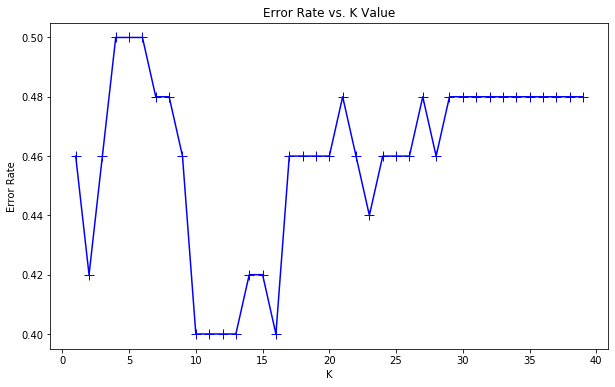

In [86]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', marker='+',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

When k = 10, 11, 12, 13, 16, the errors are reduced to minimal. Trying k = 12.

In [87]:
X = v1[['Sydney_distance', 'Sydney_brightness', 'Sydney_radiative']]
y = v1['Sydney_PM2.5_cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [88]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[26  0  0  0]
 [14  4  0  0]
 [ 3  1  0  0]
 [ 2  0  0  0]]
              precision    recall  f1-score   support

           0       0.58      1.00      0.73        26
           1       0.80      0.22      0.35        18
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         2

    accuracy                           0.60        50
   macro avg       0.34      0.31      0.27        50
weighted avg       0.59      0.60      0.51        50



/Users/yushuohan/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [90]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[25  1  0  0]
 [15  2  1  0]
 [ 2  2  0  0]
 [ 1  0  0  1]]
              precision    recall  f1-score   support

           0       0.58      0.96      0.72        26
           1       0.40      0.11      0.17        18
           2       0.00      0.00      0.00         4
           3       1.00      0.50      0.67         2

    accuracy                           0.56        50
   macro avg       0.50      0.39      0.39        50
weighted avg       0.49      0.56      0.47        50



### Decision Tree

In [128]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

In [129]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[23  2  0  1]
 [ 8  7  1  2]
 [ 2  1  1  0]
 [ 1  1  0  0]]
              precision    recall  f1-score   support

           0       0.68      0.88      0.77        26
           1       0.64      0.39      0.48        18
           2       0.50      0.25      0.33         4
           3       0.00      0.00      0.00         2

    accuracy                           0.62        50
   macro avg       0.45      0.38      0.40        50
weighted avg       0.62      0.62      0.60        50



### Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [94]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[25  1  0  0]
 [15  1  1  1]
 [ 2  2  0  0]
 [ 1  1  0  0]]
              precision    recall  f1-score   support

           0       0.58      0.96      0.72        26
           1       0.20      0.06      0.09        18
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         2

    accuracy                           0.52        50
   macro avg       0.20      0.25      0.20        50
weighted avg       0.37      0.52      0.41        50



To ensure that the best number of trees is used, a grid search is conducted.

In [95]:
error_rate = []

for i in range(50,150):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    error_rate.append(np.mean(rfc_pred != y_test))

Text(0, 0.5, 'Error Rate')

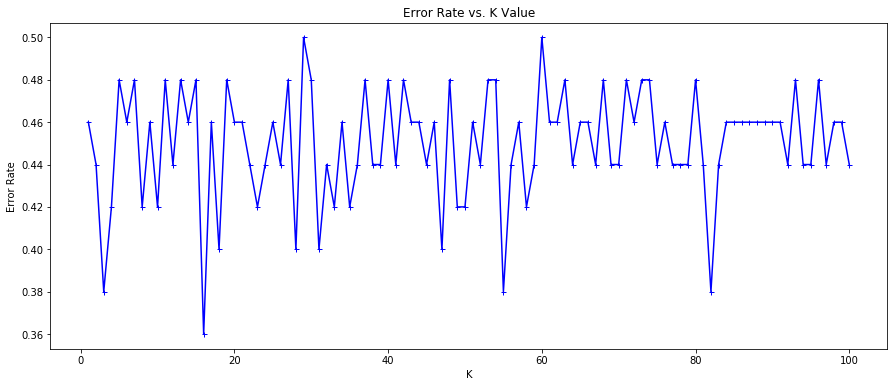

In [96]:
plt.figure(figsize=(15,6))
plt.plot(range(1,101),error_rate,color='blue', marker='+',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

So the best number of trees is 67. 

In [121]:
rfc = RandomForestClassifier(n_estimators=67)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[25  1  0  0]
 [12  4  1  1]
 [ 2  2  0  0]
 [ 0  1  0  1]]
              precision    recall  f1-score   support

           0       0.64      0.96      0.77        26
           1       0.50      0.22      0.31        18
           2       0.00      0.00      0.00         4
           3       0.50      0.50      0.50         2

    accuracy                           0.60        50
   macro avg       0.41      0.42      0.39        50
weighted avg       0.53      0.60      0.53        50



### SVC

In [122]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [123]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[26  0  0  0]
 [15  3  0  0]
 [ 3  1  0  0]
 [ 1  1  0  0]]
              precision    recall  f1-score   support

           0       0.58      1.00      0.73        26
           1       0.60      0.17      0.26        18
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         2

    accuracy                           0.58        50
   macro avg       0.29      0.29      0.25        50
weighted avg       0.52      0.58      0.47        50



/Users/yushuohan/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Similarly, a grid search is conducted in search of the best combination of the parameters of $C$, $\gamma$, and the kernel. 

In [124]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.652, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.652, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.652, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.652, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.636, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.652, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.652, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.652, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.652, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.652, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.636, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.652, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.652, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [125]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [126]:
grid.best_estimator_

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [127]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[26  0  0  0]
 [15  3  0  0]
 [ 3  1  0  0]
 [ 1  1  0  0]]
              precision    recall  f1-score   support

           0       0.58      1.00      0.73        26
           1       0.60      0.17      0.26        18
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         2

    accuracy                           0.58        50
   macro avg       0.29      0.29      0.25        50
weighted avg       0.52      0.58      0.47        50



/Users/yushuohan/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The f1-score summary below compares the prediction performance of various models for Sydney's PM2.5 level:
- KNN: Accuracy 0.60, macro avg 0.27, weighted avg 0.51.
- Logistic Regression: Accuracy 0.56, macro avg 0.39, weighted avg 0.47.
- Decision Tree: Accuracy 0.62, macro avg 0.40, weighted avg 0.60.
- Random Forest: Accuracy 0.60, macro avg 0.39, weighted avg 0.53.
- SVC: Accuracy 0.58, macro avg 0.25, weighted avg 0.47.

So together, the Decision Tree model performs the best for Sydney's PM2.5 level.

Using similar models, PM2.5 levels of Brisbane and Adelaide are also predicted. For Brisbane, the performance is summarized as follows:
- KNN: Accuracy 0.78, macro avg 0.43, weighted avg 0.73.
- Logistic Regression: Accuracy 0.74, macro avg 0.26, weighted avg 0.68.
- Decision Tree: Accuracy 0.64, macro avg 0.26, weighted avg 0.65.
- Random Forest: Accuracy 0.78, macro avg 0.43, weighted avg 0.73.
- SVC: Accuracy 0.76, macro avg 0.26, weighted avg 0.70.

So together, the KNN/Random Forest models perform the best for Brisbane's PM2.5 Level. 

For Adelaide:
- KNN: Accuracy 0.52, macro avg 0.18, weighted avg 0.37.
- Logistic Regression: Accuracy 0.56, macro avg 0.39, weighted avg 0.47.
- Decision Tree: Accuracy 0.62, macro avg 0.39, weighted avg 0.59.
- Random Forest: Accuracy 0.60, macro avg 0.29, weighted avg 0.54.
- SVC: Accuracy 0.58, macro avg 0.25, weighted avg 0.47.

So together, the Decision Tree model performs the best for Adelaide's PM2.5 level.

In summary, among the three cities, the best performing models' F1-scores can be summarized as:
- Sydney(Decision Tree): Accuracy 0.62, macro avg 0.40, weighted avg 0.60.
- Brisbane (KNN): Accuracy 0.78, macro avg 0.43, weighted avg 0.73.
- Adelaide (Decision Tree): Accuracy 0.62, macro avg 0.39, weighted avg 0.59.

Note that all of the F1-scores above are quite low. This is possibly due to the following reasons:
- Dataset is relatively small. Only around a hundred instances are available.
- Dataset's categories are biased. For all of the three cities, the PM2.5 levels are mostly good, with a few moderate and very few unhealthy instanes.
- Design of factors is biased. When designing the factors, the distance's effect is taken into account by dividing both the brightness and radiative factors by the distance factor. However, a reciprocal/inverse model may not accurately reflect the effect of distance to brightness or radiative factors. Further research is required to explore more accurate models to reflect their relationships.

Save the best performing models:

In [130]:
from joblib import dump

# Sydney
X = v1[['Sydney_distance', 'Sydney_brightness', 'Sydney_radiative']]
y = v1['Sydney_PM2.5_cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dump(dtree, 'SydneyPM2_5ClassifierModel.h5')

# Brisbane
X = v1[['Brisbane_distance', 'Brisbane_brightness', 'Brisbane_radiative']]
y = v1['Brisbane_PM2.5_cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
dump(knn, 'BrisbanePM2_5ClassifierModel.h5')

#Adelaide
X = v1[['Adelaide_distance', 'Adelaide_brightness', 'Adelaide_radiative']]
y = v1['Adelaide_PM2.5_cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

dtree2 = DecisionTreeClassifier()
dtree2.fit(X_train,y_train)
dump(dtree2, 'AdelaidePM2_5ClassifierModel.h5')

['AdelaidePM2_5ClassifierModel.h5']

# Classification Modelling for Fire Instance Confidence

NASA's satellite data has a 'confidence' column which indicates the estimated likeliness of the location actually having a fire at the image's acquired time, given all the pixels from the satellite images. The esimation is performed by a variety of intermediate algorithms when processing the image data, and thus it is considered to be accurate.

In the following, the relationship between the 'confidence' feature of a fire instance and other attributes of a fire instance is explored. Specifically, the confidence level is to be predicted given all the other features' values from a given fire instance, using various classification models. 

First, drop redundant columns and split the data.

In [30]:
v1DF.drop(['daynight', 'Date'], axis = 1, inplace = True)

X = v1DF.drop('confidence', axis = 1)
y = v1DF['confidence']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 101)

### KNN

In [1109]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [1110]:
from sklearn.metrics import classification_report,confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 14010   2823    936]
 [  7928 177388      1]
 [  2690      1  21505]]
              precision    recall  f1-score   support

           1       0.57      0.79      0.66     17769
           4       0.98      0.96      0.97    185317
           6       0.96      0.89      0.92     24196

    accuracy                           0.94    227282
   macro avg       0.84      0.88      0.85    227282
weighted avg       0.95      0.94      0.94    227282



In order to improve the result, a grid search is conducted in search of the best parameter $k$.

In [1111]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

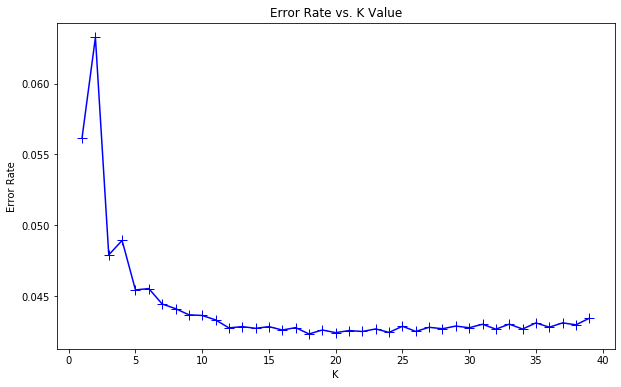

In [1112]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', marker='+',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

The best $k$ value is observed to be 18.

In [1113]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')

In [1114]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 12390   3883   1496]
 [  2795 182512     10]
 [  1431      4  22761]]
              precision    recall  f1-score   support

           1       0.75      0.70      0.72     17769
           4       0.98      0.98      0.98    185317
           6       0.94      0.94      0.94     24196

    accuracy                           0.96    227282
   macro avg       0.89      0.87      0.88    227282
weighted avg       0.96      0.96      0.96    227282



### Logistic Regression

In [1115]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

/Users/yushuohan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [1116]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[   801  15166   1802]
 [   182 180453   4682]
 [  1292  12084  10820]]
              precision    recall  f1-score   support

           1       0.35      0.05      0.08     17769
           4       0.87      0.97      0.92    185317
           6       0.63      0.45      0.52     24196

    accuracy                           0.85    227282
   macro avg       0.62      0.49      0.51    227282
weighted avg       0.80      0.85      0.81    227282



### Decision Tree

In [1117]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

In [1118]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 12467   3997   1305]
 [  4126 181191      0]
 [  1336      0  22860]]
              precision    recall  f1-score   support

           1       0.70      0.70      0.70     17769
           4       0.98      0.98      0.98    185317
           6       0.95      0.94      0.95     24196

    accuracy                           0.95    227282
   macro avg       0.87      0.87      0.87    227282
weighted avg       0.95      0.95      0.95    227282



### Random Forest

In [1119]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [1120]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[ 13127   3640   1002]
 [  2279 183038      0]
 [  1057      0  23139]]
              precision    recall  f1-score   support

           1       0.80      0.74      0.77     17769
           4       0.98      0.99      0.98    185317
           6       0.96      0.96      0.96     24196

    accuracy                           0.96    227282
   macro avg       0.91      0.89      0.90    227282
weighted avg       0.96      0.96      0.96    227282



Gridsearch on the number of trees in the forest to find the best predicting model.

In [1122]:
error_rate = []

for i in range(50,125):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    error_rate.append(np.mean(rfc_pred != y_test))

Done: 50
Done: 51
Done: 52
Done: 53
Done: 54
Done: 55
Done: 56
Done: 57
Done: 58
Done: 59
Done: 60
Done: 61
Done: 62
Done: 63
Done: 64
Done: 65
Done: 66
Done: 67
Done: 68
Done: 69
Done: 70
Done: 71
Done: 72
Done: 73
Done: 74
Done: 75
Done: 76
Done: 77
Done: 78
Done: 79
Done: 80
Done: 81
Done: 82
Done: 83
Done: 84
Done: 85
Done: 86
Done: 87
Done: 88
Done: 89
Done: 90
Done: 91
Done: 92
Done: 93
Done: 94
Done: 95
Done: 96
Done: 97
Done: 98
Done: 99
Done: 100
Done: 101
Done: 102
Done: 103
Done: 104
Done: 105
Done: 106
Done: 107
Done: 108
Done: 109
Done: 110
Done: 111
Done: 112
Done: 113
Done: 114
Done: 115
Done: 116
Done: 117
Done: 118
Done: 119
Done: 120
Done: 121
Done: 122
Done: 123
Done: 124


Text(0, 0.5, 'Error Rate')

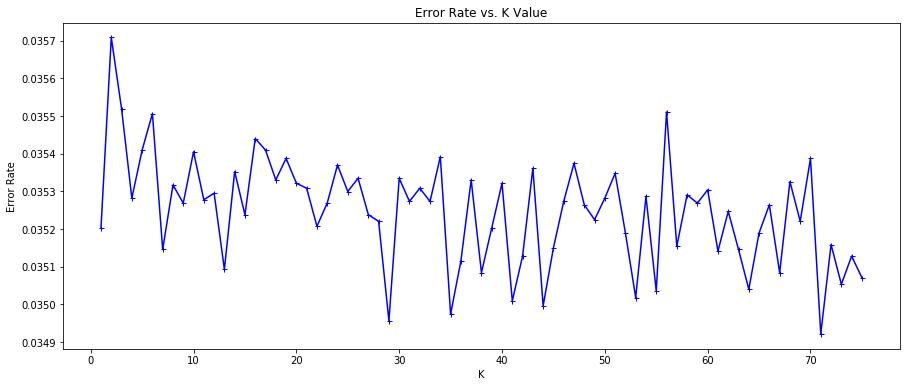

In [1123]:
plt.figure(figsize=(15,6))
plt.plot(range(1,76),error_rate,color='blue', marker='+',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

It is observed that the optimal value is at 71.

In [133]:
rfc = RandomForestClassifier(n_estimators=122)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[ 13124   3641   1004]
 [  2267 183050      0]
 [  1054      0  23142]]
              precision    recall  f1-score   support

           1       0.80      0.74      0.77     17769
           4       0.98      0.99      0.98    185317
           6       0.96      0.96      0.96     24196

    accuracy                           0.96    227282
   macro avg       0.91      0.89      0.90    227282
weighted avg       0.96      0.96      0.96    227282



### SVC

Normally, SVC would be attempted. However, since v1DF is a large dataset with over a million instances and takes 104+ MB, storing the kernel matrix, which requires the memory to scale quadratically to the data points, would require over 100GB memory. Due to the limitation of the training machine, this model is omitted.

The following summary compares the performance of the various models attempted above based on their F1-scores:
- KNN: Accuracy 0.96, Macro 0.88, Weighted 0.96
- Logistic Regression: Accuracy 0.85, Macro 0.51, Weighted 0.81
- Decision Tree: Accuracy 0.95, Macro 0.87, Weighted 0.95
- Random Forest: Accuracy 0.96, Macro 0.90, Weighted 0.96

All of the models performed quite well; Among the models, the random forest model is the best performing model. 

Save the best performing model:

In [ ]:
dump(rfc, 'ConfidenceClassifierModel.h5')

# Conclusion

In the 2019-2020 fire season, Australia faced unprecedented fire conditions. The bushfire resulted in property loss, increased carbon emission, and the pollutants it released posed great risks for human health. Through the geological visualization of the fire instances, it is observed that the coastal area of Northern Territories, Queensland, and New South Wales suffered from intense fires. 

After attempting various regression models including SVR (with linear or RBF kernel), linear regression, and ANN (with Rmsprop or Adam optimizer), it is proven that due to various limitaitons of the dataset and factor design, the dataset is not suitable for regression modelling. After categorizing the pollutant concentrations into multiple levels, a number of classification models, including KNN, Logistic Regression, Decision Tree, Random Forest, and SVC, are attempted to predict the pollutant levels. It is observed that for Sydney and Adelaide, Decision Tree model predicts the best; for Brisbane, KNN model gives the best performance. Although these classification models provide a mechanism to predict the air pollutant levels, due to the limitation of the dataset, the F1-scores of the best performing models range between 0.6-0.8, which is not ideal. A variety of environmental factors, such as wind, sand, temperature, and pressure may also played a role in determining the pollutant levels and thus resulting in the low F1-scores of the models, which do not take these environmental factors into account.

In exploration of the relationship between the confidence level of a fire instance and other instance attributes, it is shown after evaluating the performance of models including KNN, Logistic Regression, Decision Tree, and Random Forest, that the Random Forest model performs the best, with 0.96 F1-Score. Although the high F1-Score may be partially attributed to the bias of the dataset, it is shown with sufficient evidence that the confidence level of the fire instance is strongly related to other attributes (such as location, brightness, radiation, day/night, etc) of the instance, and these attributes can be used to categorize the confidence level with considerable accuracy.